# proyecto Final - TalentoTech
## Modelo para la prediccion de proyectos de energia renobvable en los municipios de Colombia

_El proyecto fue realizado en el marco del curso de Machine Learning TalentoTech_

## Descripcion 🚀

_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._


### Tecnologias utilizdas 📗 
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_



* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikit_learn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />


## Autores 😊


* **Monica ...**
* **Juan Pablo ....**
* **Juan Pablo ....**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl** 



## Tareas  ✒️

 1. Importar librerías necesarias[1]
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

## Preguntas
### 1) ¿Qué municipios son más aptos para desarrollar un proyecto de energías renovables?
### 2)  Cual es la probabilidad de que un municipio de colombia se desarrolle un proyectoe energia renovable?

# 1. Importar librerías necesarias[1]

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
!pip install sodapy

In [2]:
from sodapy import Socrata

In [3]:
client = Socrata("www.datos.gov.co", None)

# 2. Cargar los Datos

* Dataframe 1- Estado de la prestación del servicio de energía en Zonas No Interconectadas\
[enlace](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)

In [4]:
results1 = client.get("3ebi-d83g", limit=5000)

In [5]:
datos1 = pd.DataFrame.from_records(results1)
datos1.head()

,id_dpto,dpto,id_mpio,mpio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9


In [6]:
#Analisis dataframe
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_dpto               4273 non-null   object
 1   dpto                  4273 non-null   object
 2   id_mpio               4273 non-null   object
 3   mpio                  4273 non-null   object
 4   id_localidad          4273 non-null   object
 5   localidad             4273 non-null   object
 6   anio                  4273 non-null   object
 7   mes                   4273 non-null   object
 8   energia_activa        4273 non-null   object
 9   energia_reactiva      4273 non-null   object
 10  potencia_maxima       4273 non-null   object
 11  dia_demanda_maxima    4272 non-null   object
 12  fecha_demanda_maxima  4273 non-null   object
 13  prom_diario_horas     4273 non-null   object
dtypes: object(14)
memory usage: 467.5+ KB


In [7]:
df1 = pd.DataFrame(
    {'municipio': datos1['mpio'],
     #'departamento': datos1['dpto'],
     #'anio': datos1['anio'],
     'potencia_m': datos1['potencia_maxima'],
     'prom_diaria': datos1['prom_diario_horas'],
     'energia_activa': datos1['energia_activa'],
     'energia_reactiva': datos1['energia_reactiva']
    }
)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         4273 non-null   object
 1   potencia_m        4273 non-null   object
 2   prom_diaria       4273 non-null   object
 3   energia_activa    4273 non-null   object
 4   energia_reactiva  4273 non-null   object
dtypes: object(5)
memory usage: 167.0+ KB


In [9]:
df1.isnull().sum()

municipio           0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
dtype: int64

In [10]:
#pasa  los datos a numericos 
df1['potencia_m'] = pd.to_numeric(df1['potencia_m'], errors='coerce')
df1['prom_diaria'] = pd.to_numeric(df1['prom_diaria'], errors='coerce')
df1['energia_activa'] = pd.to_numeric(df1['energia_activa'], errors='coerce')
df1['energia_reactiva'] = pd.to_numeric(df1['energia_reactiva'], errors='coerce')
#df1['anio'] = pd.to_numeric(df1['anio'], errors='coerce')
df1

,municipio,potencia_m,prom_diaria,energia_activa,energia_reactiva
0,PUERTO NARIÑO,286.40,24.00,132215,41907.0
1,TARAPACA (ANM),102.60,10.16,28132,12662.0
2,VIGÍA DEL FUERTE,27.46,4.19,2686,1110.0
3,PROVIDENCIA,2190.28,23.59,1331271,284638.0
4,CARTAGENA DE INDIAS,247.59,10.90,64368,30561.0
...,...,...,...,...,...
4268,BUENAVENTURA,31.23,10.05,7610,3285.0
4269,CARURÚ,87.82,16.39,31775,7881.0
4270,MITÚ,3236.71,23.56,1590470,387197.0
4271,TARAIRA,136.84,13.01,39226,10719.0


In [14]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273 entries, 0 to 4272
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         4273 non-null   object 
 1   potencia_m        4273 non-null   float64
 2   prom_diaria       4273 non-null   float64
 3   energia_activa    4273 non-null   int64  
 4   energia_reactiva  4273 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 167.0+ KB


<Axes: >

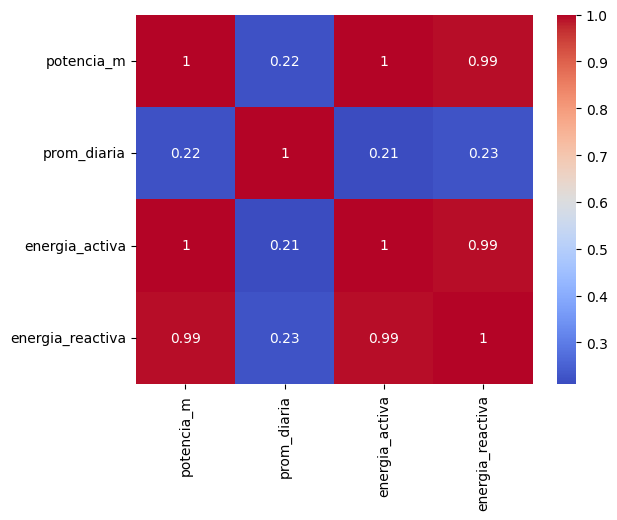

In [15]:
#Analisis de correlacion entre las variables de interes
correlacion1 = df1[['potencia_m',  'prom_diaria', 'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacion1, annot=True, cmap='coolwarm')

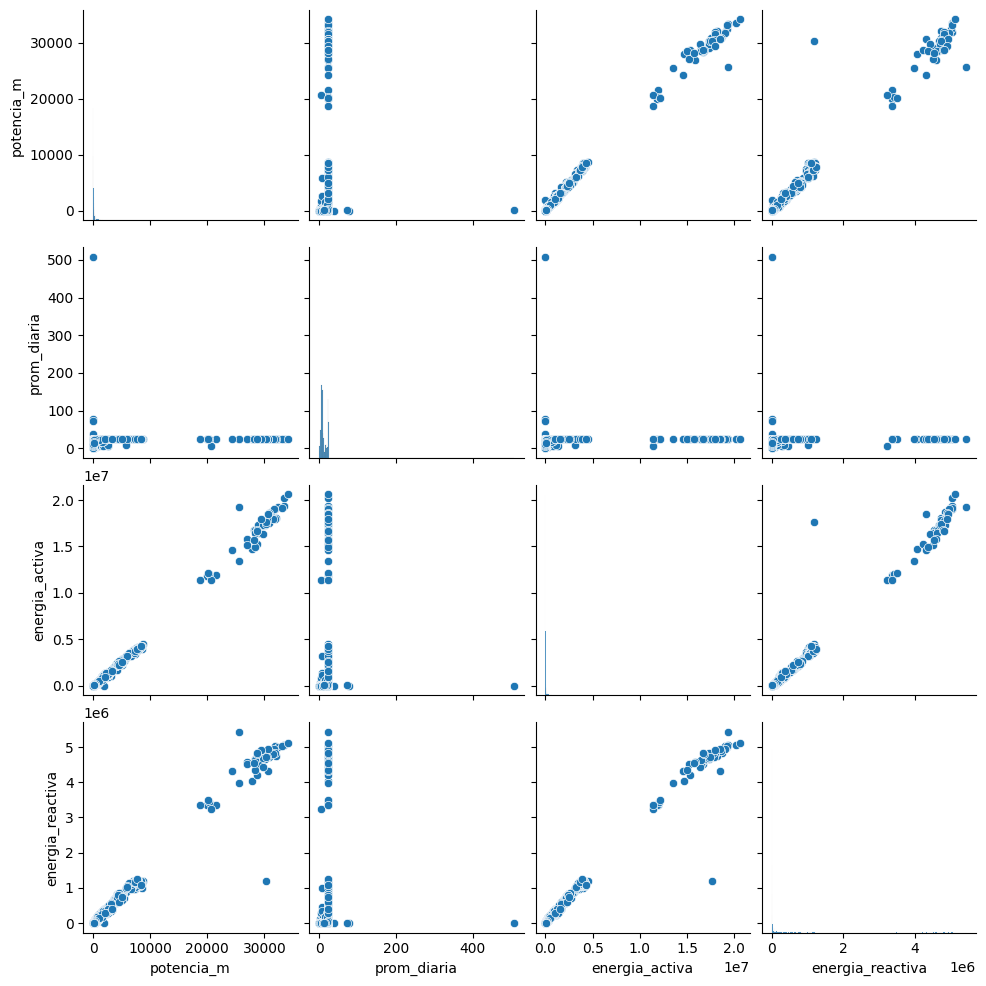

In [16]:
sns.pairplot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7041ba454a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7041ba454ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7041ba4547d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7041ba4553a0>],
 'fliers': [],
 'means': []}

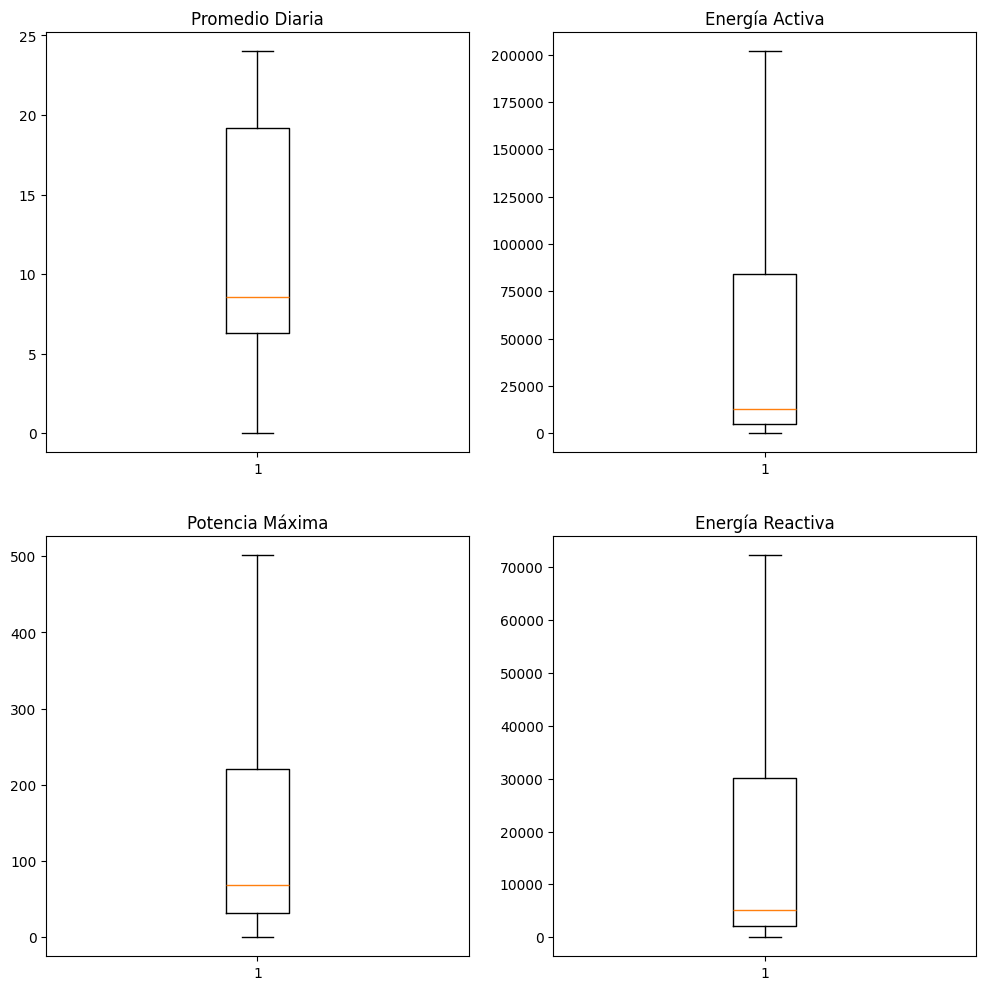

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0][0].set_title('Promedio Diaria')
ax[1][0].set_title('Potencia Máxima')
ax[0][1].set_title('Energía Activa')
ax[1][1].set_title('Energía Reactiva')

#boxplots.
ax[0][0].boxplot(x=df1['prom_diaria'], showfliers=False)  
ax[1][0].boxplot(x=df1['potencia_m'], showfliers=False)
ax[0][1].boxplot(x=df1['energia_activa'], showfliers=False)
ax[1][1].boxplot(x=df1['energia_reactiva'], showfliers=False)


* Dataframe 2 - Consumo percapita de energia electrica segun su fuente en Colombia-our world in data energy
[vínculo](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv)


In [21]:
datos2 = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
datos2.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [22]:
datos2.shape

(21812, 130)

In [23]:
#seleccionamos los datos de Colombia
colombia = datos2['country'] == 'Colombia'
print(colombia)

0        False
1        False
2        False
3        False
4        False
         ...  
21807    False
21808    False
21809    False
21810    False
21811    False
Name: country, Length: 21812, dtype: bool


In [24]:
colombia.value_counts()

country
False    21688
True       124
Name: count, dtype: int64

In [25]:
datacolombia = datos2[datos2['country'] == 'Colombia']
datacolombia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
4506,Colombia,1900,COL,4034733.0,4.353822e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,Colombia,1901,COL,4112556.0,4.413478e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,Colombia,1902,COL,4194368.0,4.486636e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,Colombia,1903,COL,4280293.0,4.548537e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,Colombia,1904,COL,4367979.0,4.620044e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
datacolombia.shape

(124, 130)

In [24]:
datacolombia.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [25]:
datacolombia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 4506 to 4629
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 126.9+ KB


In [26]:
# Seleccionamos las variables de interes
df2 = pd.DataFrame(
    {#'anio': datacolombia['year'],
     'cons_bio_per': datacolombia['biofuel_elec_per_capita'],
     'cons_carb_per': datacolombia['coal_elec_per_capita'],
     'cons_gas_per': datacolombia['gas_elec_per_capita'],
     'cons_conb_per': datacolombia['oil_elec_per_capita'],
     'cons_solar_per': datacolombia['solar_energy_per_capita'],
     'cons_wind_per': datacolombia['wind_energy_per_capita'],
     'cons_hydro_per': datacolombia['hydro_elec_per_capita'],
     'cons_nuclear_per': datacolombia['nuclear_elec_per_capita'],
     'cons_other_per': datacolombia['other_renewables_elec_per_capita'],
     'cons_total_per': datacolombia['electricity_demand_per_capita']
    }
)
df2

,cons_bio_per,cons_carb_per,cons_gas_per,cons_conb_per,cons_solar_per,cons_wind_per,cons_hydro_per,cons_nuclear_per,cons_other_per,cons_total_per
4506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4625,31.283,161.993,262.217,54.795,6.936,3.326,1055.643,0.0,31.283,1575.893
4626,42.214,183.976,298.249,52.032,9.839,0.522,951.097,0.0,42.214,1552.110
4627,43.481,87.351,267.099,54.934,16.407,3.071,1178.262,0.0,43.481,1641.026
4628,42.025,84.821,323.090,53.013,25.260,3.763,1132.166,0.0,42.025,1650.922


In [27]:
df2.shape

(124, 10)

In [28]:
df2.dtypes

cons_bio_per        float64
cons_carb_per       float64
cons_gas_per        float64
cons_conb_per       float64
cons_solar_per      float64
cons_wind_per       float64
cons_hydro_per      float64
cons_nuclear_per    float64
cons_other_per      float64
cons_total_per      float64
dtype: object

In [29]:
df2.isnull().sum()

cons_bio_per        100
cons_carb_per       100
cons_gas_per        100
cons_conb_per       100
cons_solar_per       90
cons_wind_per        90
cons_hydro_per       65
cons_nuclear_per     65
cons_other_per       74
cons_total_per      100
dtype: int64

In [30]:
# Imputamos los nan por la media
df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
df2['cons_carb_per'].fillna(df2['cons_carb_per'].mean(), inplace=True)
df2['cons_gas_per'].fillna(df2['cons_gas_per'].mean(), inplace=True)
df2['cons_conb_per'].fillna(df2['cons_conb_per'].mean(), inplace=True)
df2['cons_hydro_per'].fillna(df2['cons_hydro_per'].mean(), inplace=True)
df2['cons_solar_per'].fillna(df2['cons_solar_per'].mean(), inplace=True)
df2['cons_wind_per'].fillna(df2['cons_wind_per'].mean(), inplace=True)
df2['cons_nuclear_per'].fillna(df2['cons_nuclear_per'].mean(), inplace=True)
df2['cons_other_per'].fillna(df2['cons_other_per'].mean(), inplace=True)
df2['cons_total_per'].fillna(df2['cons_total_per'].mean(), inplace=True)

/tmp/ipykernel_4939/1771081078.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['cons_bio_per'].fillna(df2['cons_bio_per'].mean(), inplace=True)
/tmp/ipykernel_4939/1771081078.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [31]:
df2.isnull().sum()

cons_bio_per        0
cons_carb_per       0
cons_gas_per        0
cons_conb_per       0
cons_solar_per      0
cons_wind_per       0
cons_hydro_per      0
cons_nuclear_per    0
cons_other_per      0
cons_total_per      0
dtype: int64

<Axes: >

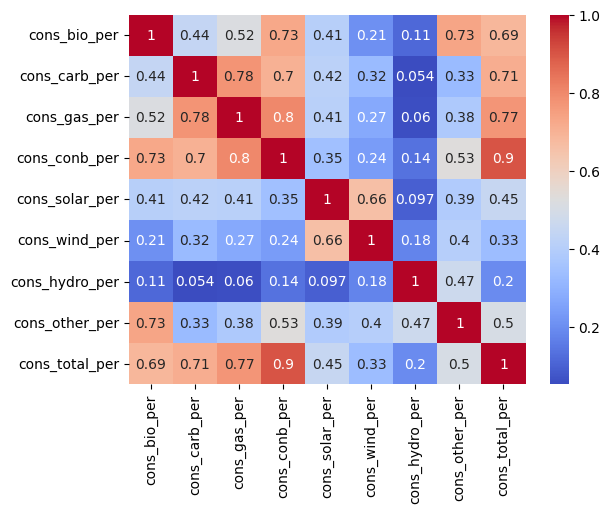

In [32]:
#Buscamos correlaciones
correlacion2 = df2[['cons_bio_per',	'cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_other_per', 'cons_total_per']].corr()
sns.heatmap(correlacion2, annot=True, cmap='coolwarm')

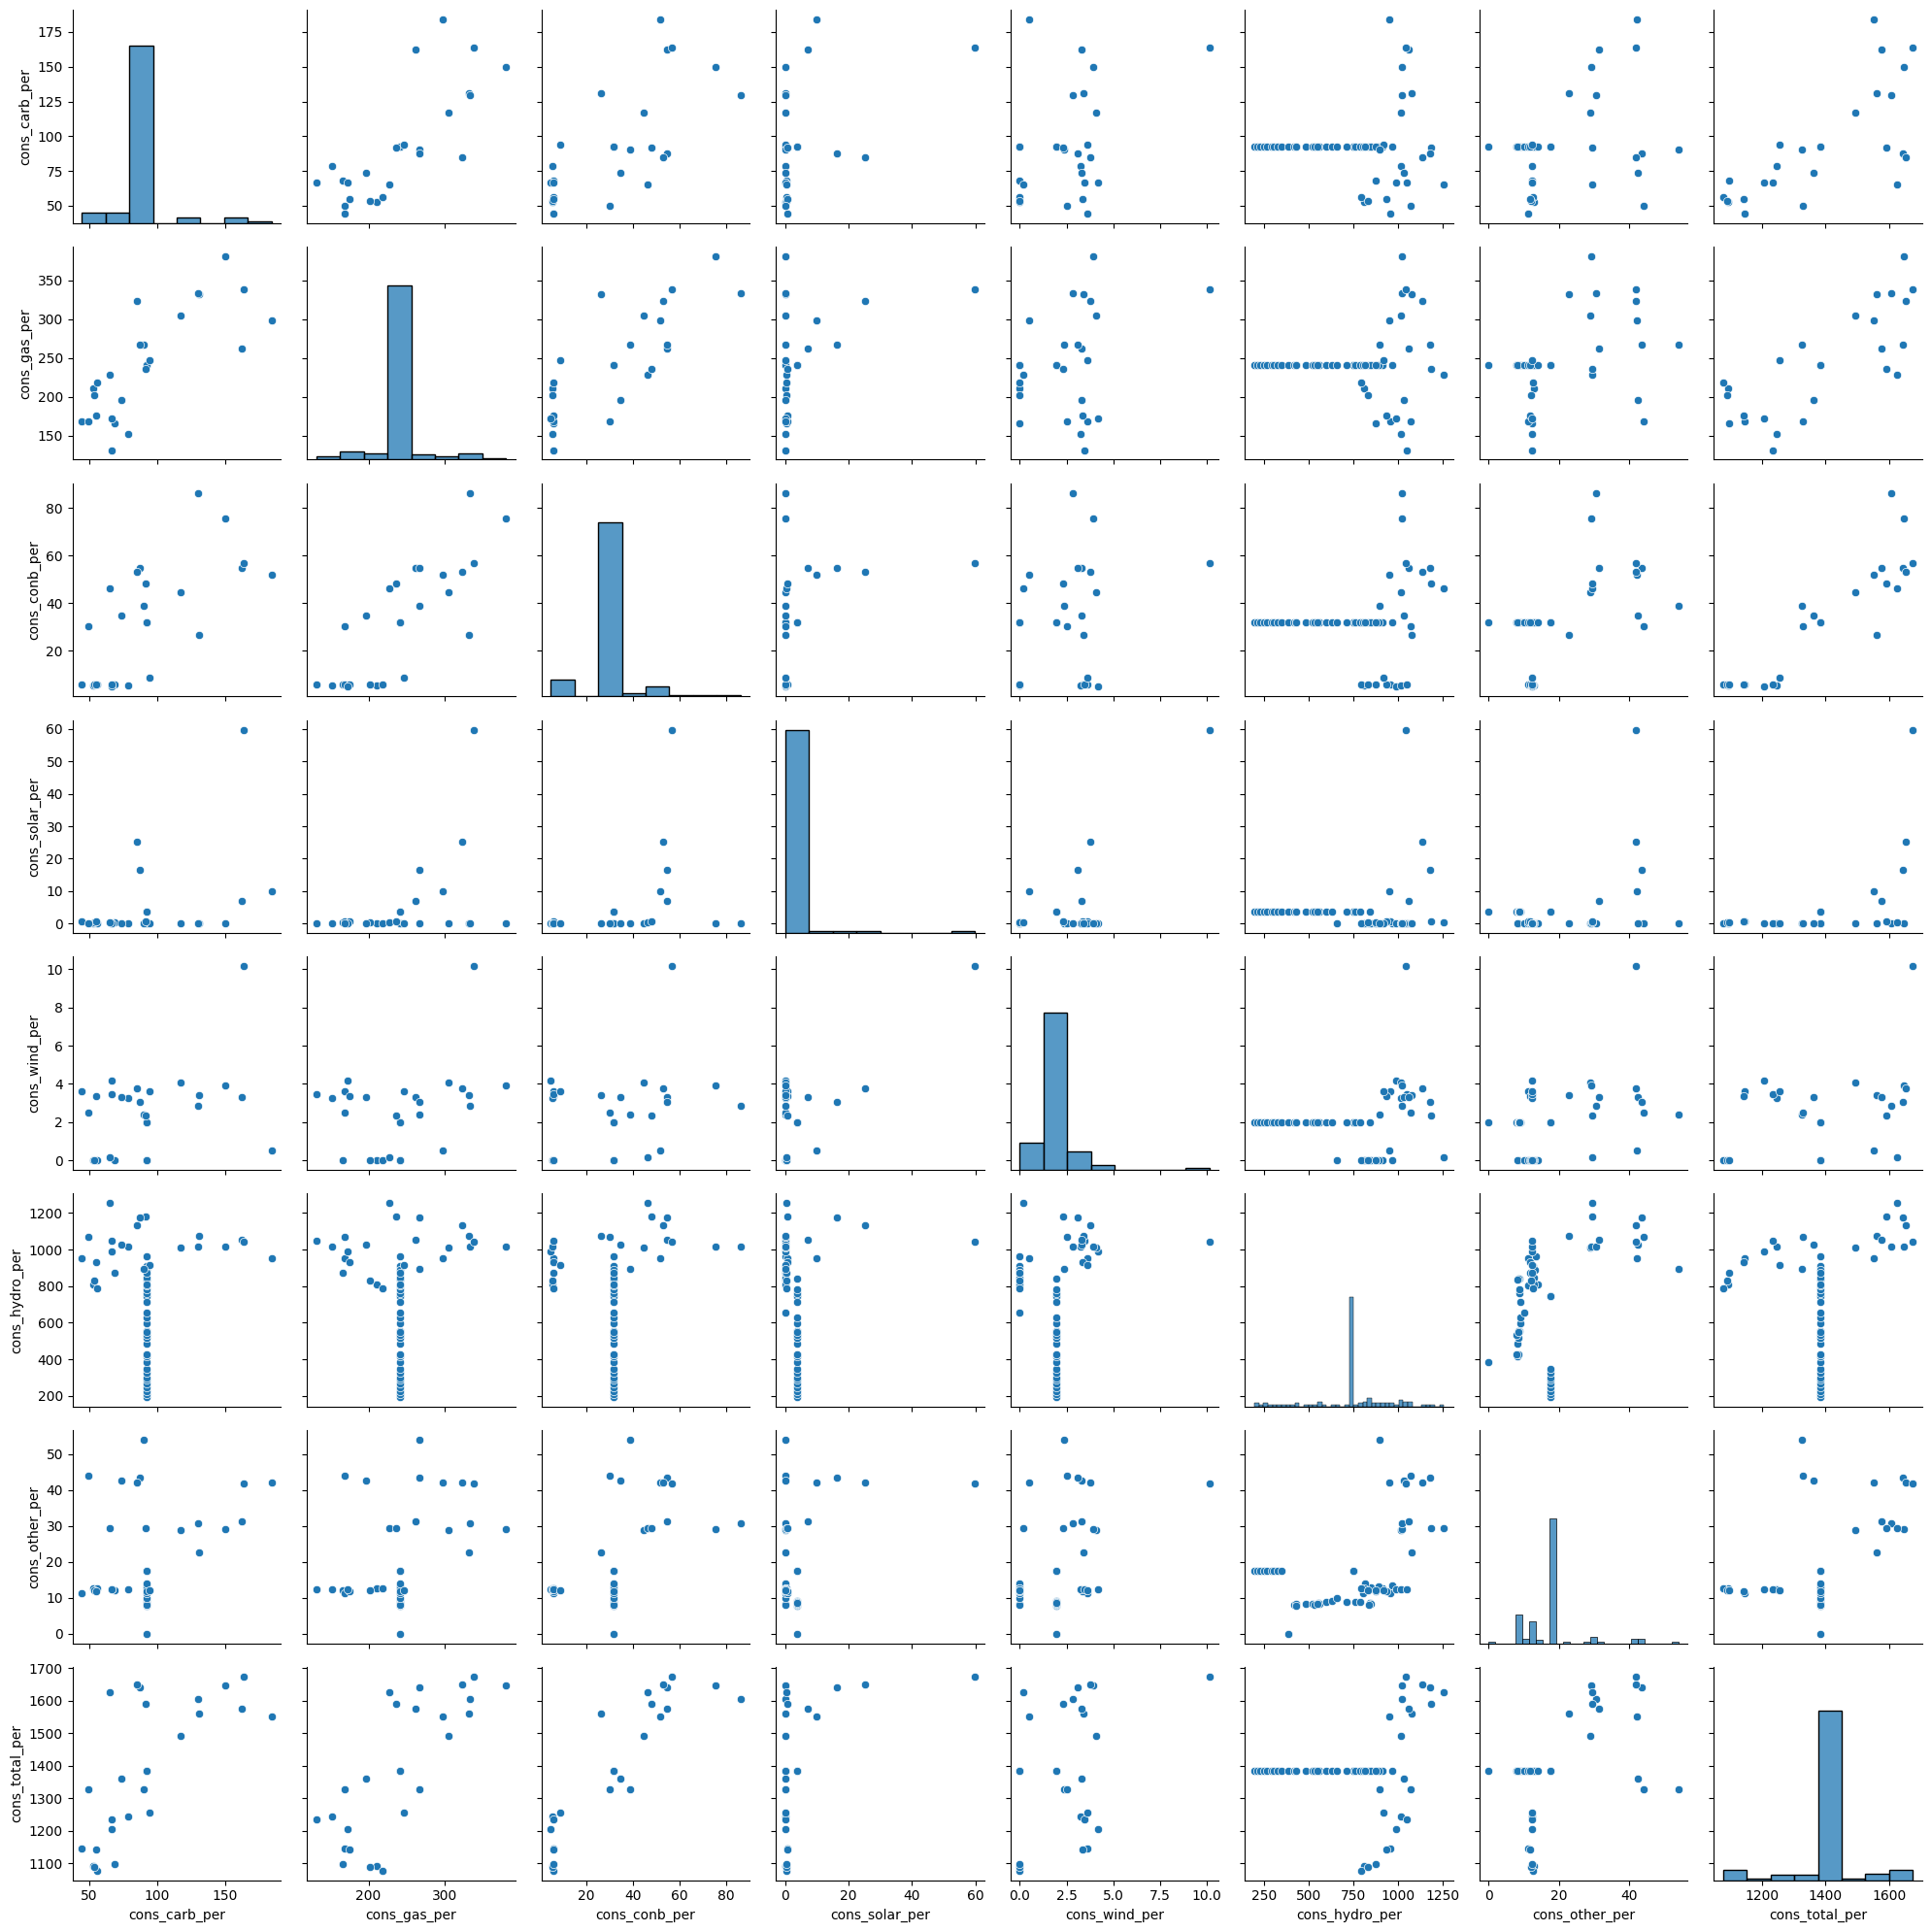

In [33]:
columnas = ['cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_other_per', 'cons_total_per']
sns.pairplot(df2[columnas], height=2.5)
plt.tight_layout()
plt.show()

<Axes: >

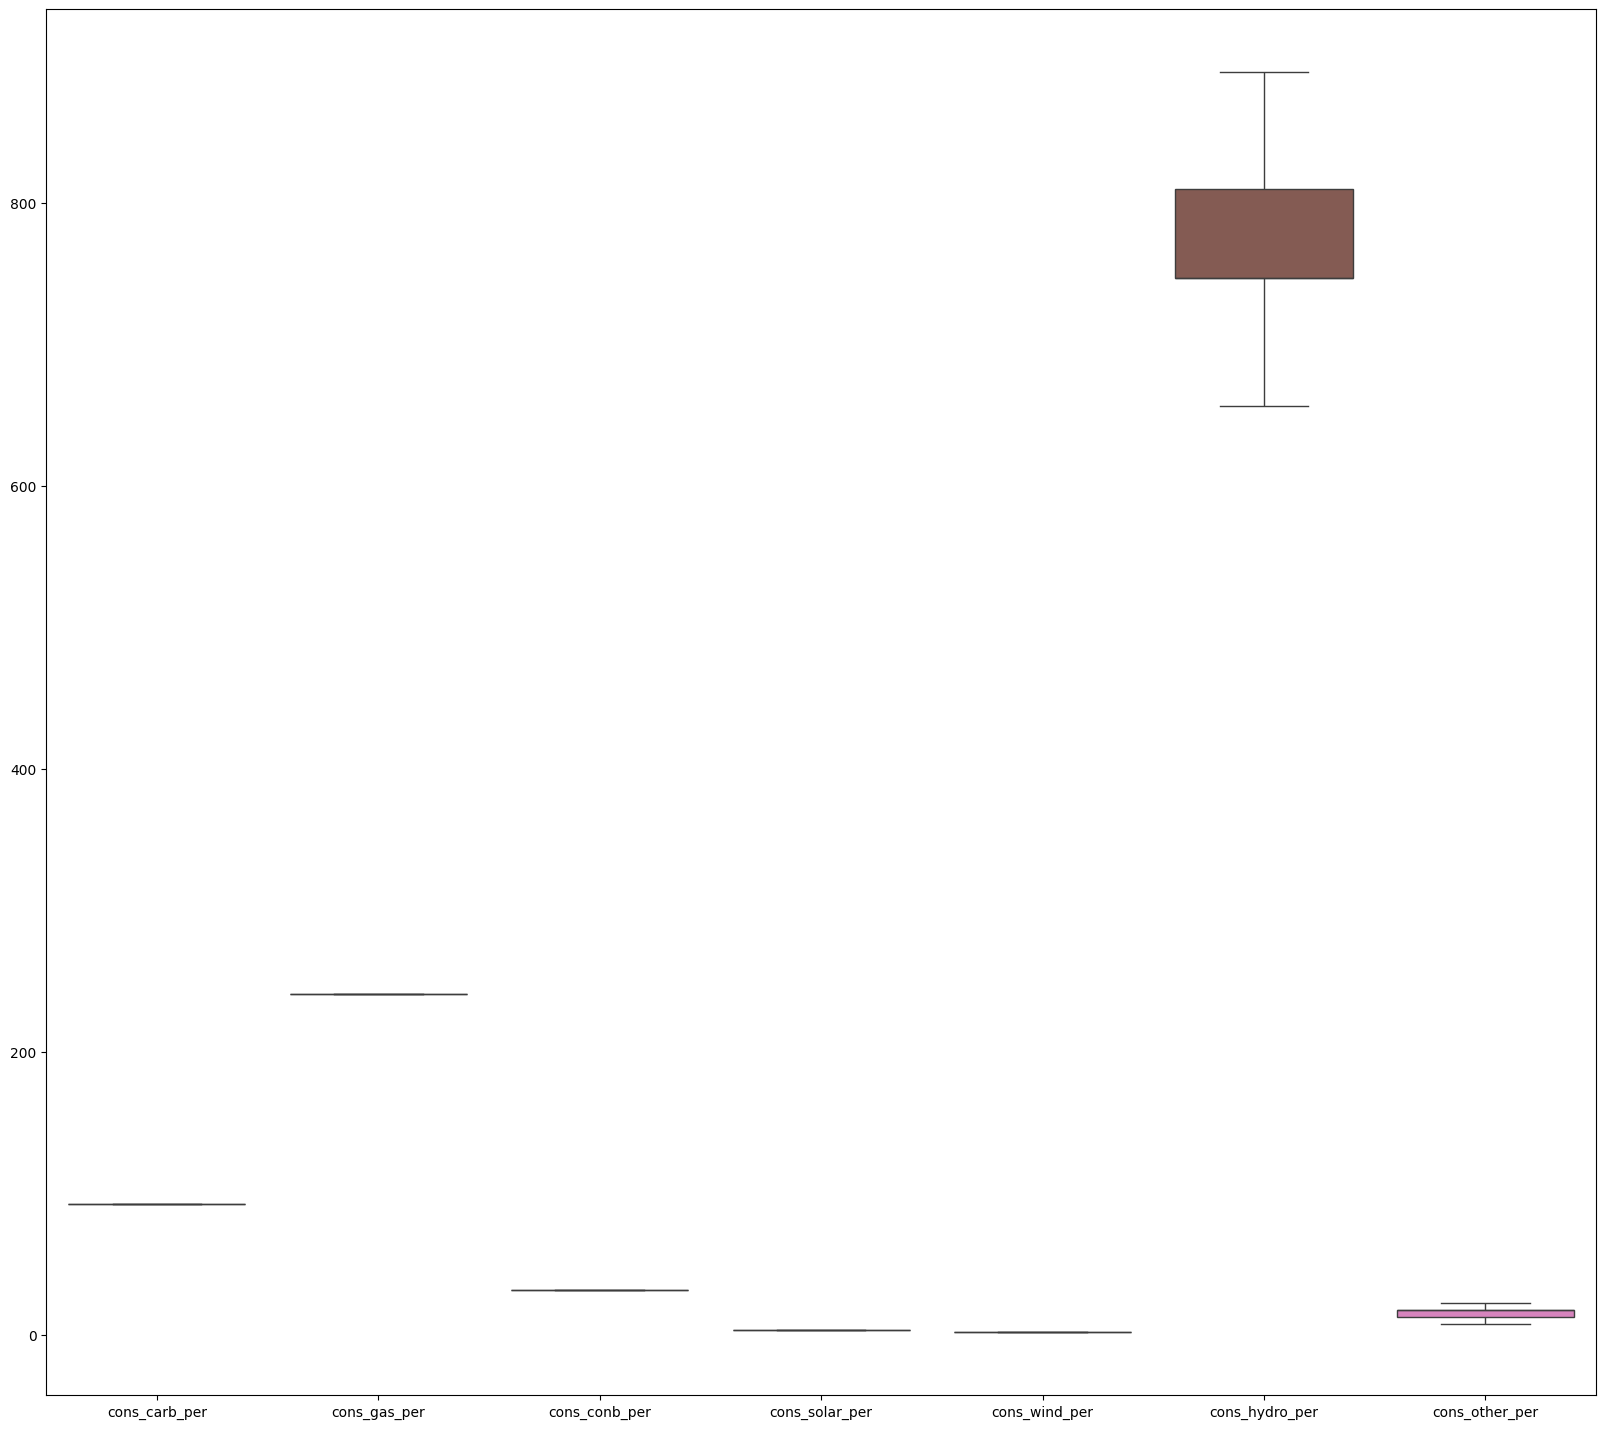

In [34]:
plt.figure(figsize=(20, 18))
sns.boxplot(df2[['cons_carb_per', 'cons_gas_per', 'cons_conb_per', 'cons_solar_per',	'cons_wind_per', 'cons_hydro_per', 'cons_other_per']], showfliers=False)  


* Dataframe 3 -  FNCER: Incorporar en la matriz energética nueva capacidad instalada a partir de Fuentes No Convencionales de Energía Renovable - FNCER\
[vínculo](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [26]:
results3 = client.get("vy9n-w6hc", limit=3000)
datos3 = pd.DataFrame.from_records(results3)
datos3.head()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032


In [28]:
datos3['tipo'].describe()

count       158
unique        2
top       Solar
freq        145
Name: tipo, dtype: object

In [29]:
datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   proyecto                158 non-null    object
 1   tipo                    158 non-null    object
 2   capacidad               158 non-null    object
 3   departamento            158 non-null    object
 4   municipio               158 non-null    object
 5   codigo_departamento     158 non-null    object
 6   codigo_municipio        158 non-null    object
 7   fecha_estimada_fpo      158 non-null    object
 8   energia_kwh_d_a         158 non-null    object
 9   usuarios                158 non-null    object
 10  inversi_n_estimada_cop  158 non-null    object
 11  empleos_estimados       158 non-null    object
 12  emisiones_co2_ton_a_o   158 non-null    object
dtypes: object(13)
memory usage: 16.2+ KB


In [36]:
df3 = pd.DataFrame(
    {'municipio': datos3['municipio'],
     'capacidad': datos3['capacidad'],
     'tipo': datos3['tipo'],
     'usuarios': datos3['usuarios'],
     'energía': datos3['energia_kwh_d_a'],
     'emisiones': datos3['emisiones_co2_ton_a_o'],
     'inversion': datos3['inversi_n_estimada_cop']
    }
)


In [39]:
df3.shape

(158, 7)

In [41]:
df3.isnull().sum()

municipio    0
capacidad    0
tipo         0
usuarios     0
energía      0
emisiones    0
inversion    0
dtype: int64

In [42]:
df3.dtypes

municipio    object
capacidad    object
tipo         object
usuarios     object
energía      object
emisiones    object
inversion    object
dtype: object

In [44]:
#pasamos los datos3 a numericos
for col in ['usuarios', 'capacidad', 'energía', 'emisiones', 'inversion']:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')
df3

,municipio,capacidad,tipo,usuarios,energía,emisiones,inversion
0,URIBIA,18.42,Eólico,30665,176832,51635,79206000000
1,YUMBO,9.80,Solar,8157,47040,13736,42140000000
2,SANTA ROSA,8.06,Solar,6709,38688,11297,34658000000
3,EL PASO,67.00,Solar,55769,321600,93907,288100000000
4,CASTILLA LA NUEVA,20.00,Solar,16647,96000,28032,86000000000
...,...,...,...,...,...,...,...
153,"""""",5.94,Solar,4944,28512,8326,22275000000
154,"""""",3.96,Solar,3296,19008,5550,14850000000
155,BARRANCABERMEJA,21.00,Solar,17480,100800,29434,78750000000
156,VILLAVICENCIO,1.90,Solar,1582,9120,2663,8170000000


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  158 non-null    object 
 1   capacidad  158 non-null    float64
 2   tipo       158 non-null    object 
 3   usuarios   158 non-null    int64  
 4   energía    158 non-null    int64  
 5   emisiones  158 non-null    int64  
 6   inversion  158 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 8.8+ KB


<Axes: >

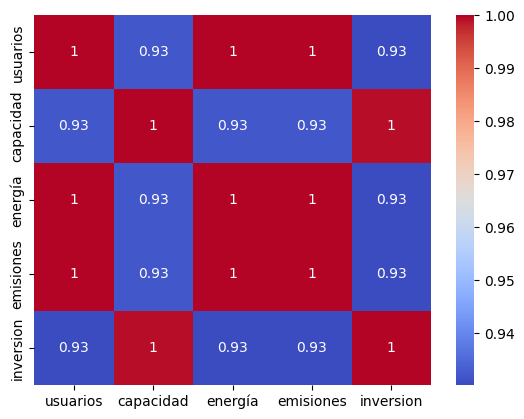

In [47]:
#correlcion
correlacion3 = df3[[ 'usuarios', 'capacidad', 'energía', 'emisiones', 'inversion']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')

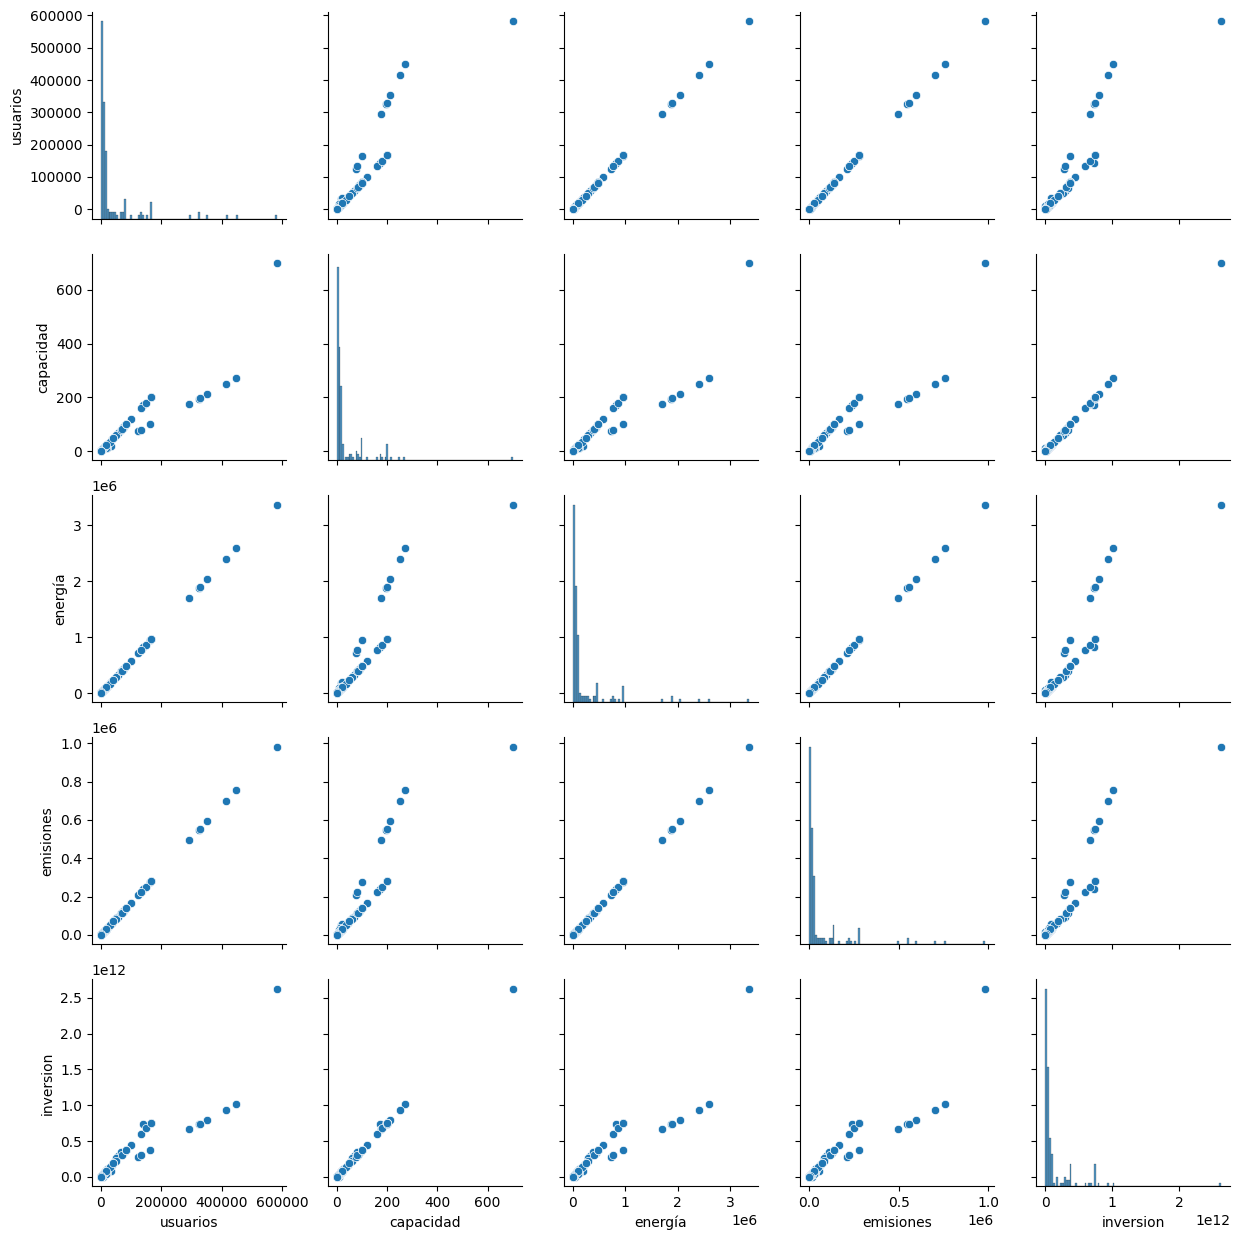

In [48]:
columnas = ['usuarios', 'capacidad', 'energía', 'emisiones', 'inversion']
sns.pairplot(df3[columnas], height=2.5)
plt.tight_layout()
plt.show()

* Dataframe 4 -  Velocidad del viento en los municipios de colombia
[vínculo](https://www.datos.gov.co/Ambiente-y-Desarrollo-Sostenible/Velocidad-Viento/sgfv-3yp8/about_data)

In [49]:
results4 = client.get("sgfv-3yp8", limit=7000)

In [58]:
datos4 = pd.DataFrame.from_records(results4)
datos4.head()

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0026125505,0103,2016-07-17T05:50:00.000,0,LA BELLA - AUT,QUINDÍO,CALARCÁ,CAUCA,4.501111111,-75.67138889,Velocidad Viento (10 min),m/s
1,0026055120,0103,2018-07-29T12:50:00.000,0.5,UNIVERSIDAD DEL VALLE - AUT,VALLE DEL CAUCA,CALI,CAUCA,3.378,-76.53388889,Velocidad Viento (10 min),m/s
2,0021205710,0103,2018-07-30T10:00:00.000,1.9,JARDIN BOTANICO - AUT,BOGOTA,"BOGOTA, D.C",ALTO MAGDALENA,4.669333333,-74.10266667,Velocidad Viento (10 min),m/s
3,0023025502,0103,2016-08-06T04:25:00.000,1.2,ALMACAFE LETRAS - AUT,CALDAS,MANIZALES,MEDIO MAGDALENA,5.044997222,-75.33221944,Velocidad Viento (10 min),m/s
4,0021255160,0103,2012-04-28T06:20:00.000,0.7,HACIENDA PAJONALES,TOLIMA,AMBALEMA,ALTO MAGDALENA,4.760722222,-74.83425,Velocidad Viento (10 min),m/s


In [59]:
df4 = pd.DataFrame(
    {'municipio': datos4['municipio'],
     #'departamento': datos1['dpto'],
     'velocidad_viento': datos4['valorobservado']
    }
)

In [60]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   municipio         7000 non-null   object
 1   velocidad_viento  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [61]:
df4.isnull().sum()

municipio           0
velocidad_viento    0
dtype: int64

In [62]:
#pasar la columna velocidad_viento a numérico
df4['velocidad_viento'] = pd.to_numeric(df4['velocidad_viento'], errors='coerce')

In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         7000 non-null   object 
 1   velocidad_viento  7000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.5+ KB


In [64]:
# Agrupar por 'municipio' y calcular la media de 'dias_lluvia' para cada uno
df4 = df4.groupby('municipio')['velocidad_viento'].mean().reset_index()

df4

,municipio,velocidad_viento
0,<nil>,0.100000
1,ABRIAQUÍ,1.200000
2,ACANDÍ,1.527586
3,ACEVEDO,2.019064
4,AGUACHICA,1.152941
...,...,...
316,YOPAL,1.988889
317,ZETAQUIRÁ,0.700000
318,ZIPAQUIRÁ,1.972020
319,ZONA BANANERA,1.123810


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         321 non-null    object 
 1   velocidad_viento  321 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


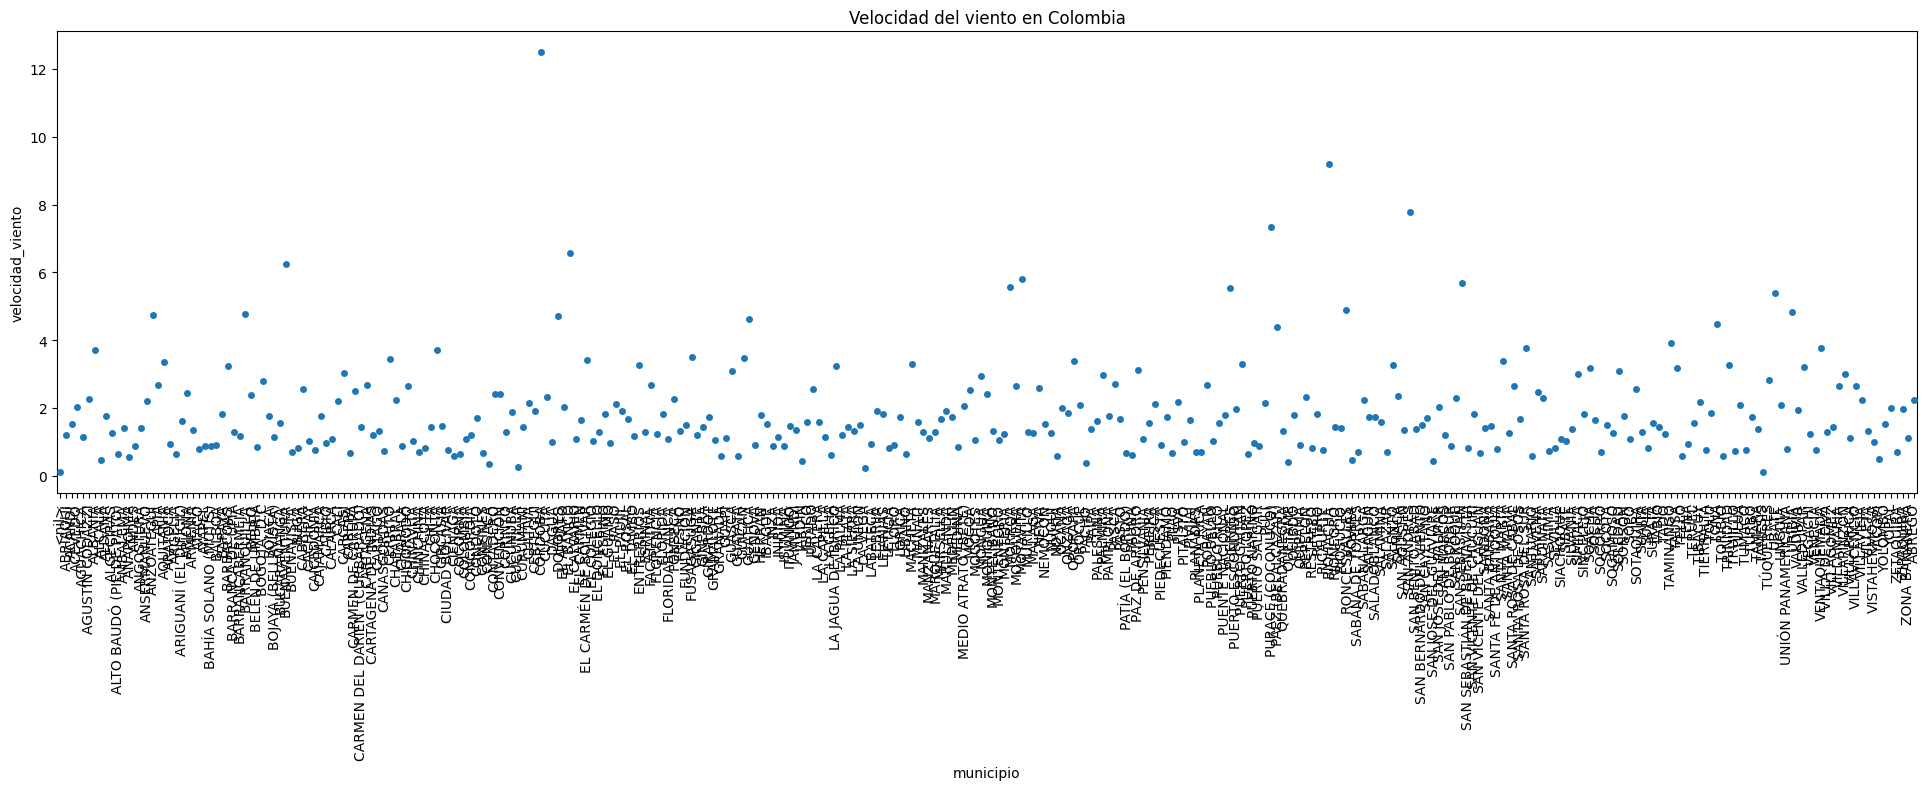

In [66]:
plt.figure(figsize=(24, 6))
ax = sns.stripplot(data=df4, x=df4['municipio'], y=df4['velocidad_viento'])
ax.set_title('Velocidad del viento en Colombia')
ax.tick_params(axis='x', rotation=90)

plt.show()

<Axes: xlabel='velocidad_viento'>

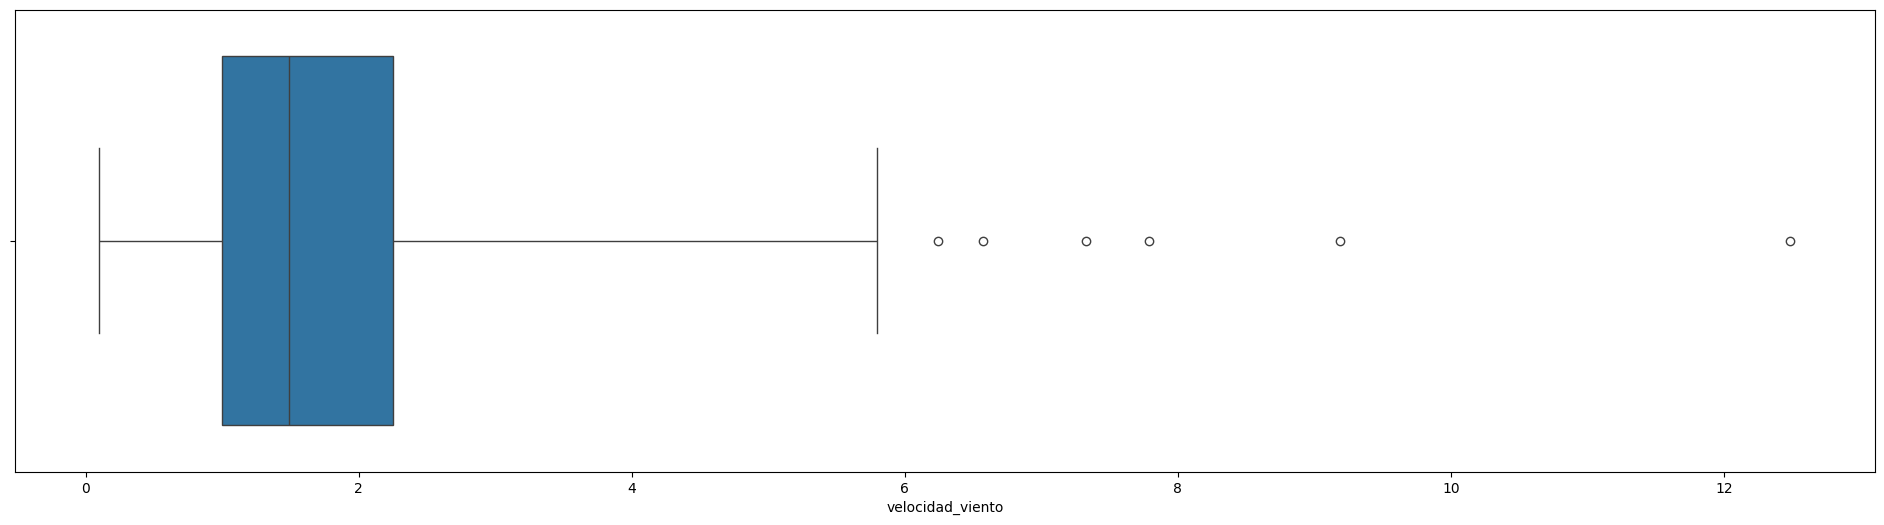

In [67]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df4['velocidad_viento'], whis=3)

* Dataframe 5 -  Dias con lluvia en los municipios de colombia\
  INFORMACIÓN GENERAL ESTACIONES,,,,,,,,,NORMAL CLIMATOLÓGICA ESTÁNDAR DE No DE DÍAS CON LLUVIA ≥ 1 mm PARA EL PERIODO 1991-2020,,,,,,,,,,,,,  Cumplen la directriz No 1203 del 2017 de la OMM,\
[vínculo](http://archivo.ideam.gov.co/web/tiempo-y-clima/clima)

In [68]:
datos5 = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
datos5.head()

,CODIGO,CATEGORIA,ESTACIÓN,MUNICIPIO,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,El Encanto,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,El Encanto,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,La Pedrera,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,La Pedrera,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,La Pedrera,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"


In [69]:
datos5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CODIGO             1445 non-null   int64 
 1   CATEGORIA          1445 non-null   object
 2   ESTACIÓN           1445 non-null   object
 3   MUNICIPIO          1445 non-null   object
 4   DEPARTAMENTO       1445 non-null   object
 5   AO                 1445 non-null   int64 
 6   ALTITUD (m)        1445 non-null   int64 
 7   LONGITUD           1445 non-null   object
 8   LATITUD            1445 non-null   object
 9   ENE                1445 non-null   object
 10  FEB                1445 non-null   object
 11  MAR                1445 non-null   object
 12  ABR                1445 non-null   object
 13  MAY                1445 non-null   object
 14  JUN                1445 non-null   object
 15  JUL                1445 non-null   object
 16  AGO                1445 non-null   object


In [70]:
df5 = pd.DataFrame(
    {'municipio': datos5['MUNICIPIO'],
     'dias_lluvia': datos5['ANUAL'],
     'longitud': datos5['LONGITUD'],
     'latitud': datos5['LATITUD'],
     'altitud': datos5['ALTITUD (m)']
    }
)
df5

,municipio,dias_lluvia,longitud,latitud,altitud
0,El Encanto,"191,7","-73,20","-1,77",120
1,El Encanto,"191,1","-73,21","-1,75",120
2,La Pedrera,"216,0","-69,47","-1,23",101
3,La Pedrera,"161,8","-69,59","-1,31",102
4,La Pedrera,"204,0","-70,18","-1,53",109
...,...,...,...,...,...
1440,Puerto Carreño,"133,2","-67,49","6,18",57
1441,Puerto Carreño,"130,7","-67,64","5,68",65
1442,Santa Rosalía,"98,7","-70,85","5,14",112
1443,Santa Rosalía,"113,4","-70,68","5,35",106


In [71]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   municipio    1445 non-null   object
 1   dias_lluvia  1445 non-null   object
 2   longitud     1445 non-null   object
 3   latitud      1445 non-null   object
 4   altitud      1445 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.6+ KB


In [72]:
 # elimina espacios en blanco
df5['dias_lluvia'] = df5['dias_lluvia'].str.strip()
df5['longitud'] = df5['longitud'].str.strip()
df5['latitud'] = df5['latitud'].str.strip()



In [73]:
 # Cambia comas por puntos en el campo 'dias_lluvia'
df5['dias_lluvia'] = df5['dias_lluvia'].str.replace(',', '.', regex=False)
df5['longitud'] = df5['longitud'].str.replace(',', '.', regex=False)
df5['latitud'] = df5['latitud'].str.replace(',', '.', regex=False)



In [75]:
# conversion a numerico
df5['dias_lluvia'] = pd.to_numeric(df5['dias_lluvia'], errors='coerce')
df5['latitud'] = pd.to_numeric(df5['latitud'], errors='coerce')
df5['longitud'] = pd.to_numeric(df5['longitud'], errors='coerce')


In [76]:
#pasa municipio a mayusculas
df5['municipio'] = df5['municipio'].str.upper()
df5

,municipio,dias_lluvia,longitud,latitud,altitud
0,EL ENCANTO,191.7,-73.20,-1.77,120
1,EL ENCANTO,191.1,-73.21,-1.75,120
2,LA PEDRERA,216.0,-69.47,-1.23,101
3,LA PEDRERA,161.8,-69.59,-1.31,102
4,LA PEDRERA,204.0,-70.18,-1.53,109
...,...,...,...,...,...
1440,PUERTO CARREÑO,133.2,-67.49,6.18,57
1441,PUERTO CARREÑO,130.7,-67.64,5.68,65
1442,SANTA ROSALÍA,98.7,-70.85,5.14,112
1443,SANTA ROSALÍA,113.4,-70.68,5.35,106


In [77]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    1445 non-null   object 
 1   dias_lluvia  1445 non-null   float64
 2   longitud     1445 non-null   float64
 3   latitud      1445 non-null   float64
 4   altitud      1445 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 56.6+ KB


In [78]:
# Agrupar por municipio y calcular la media de dias_lluvia y las coordenadas de latitud, longitud y altitud
df5 = df5.groupby('municipio').agg({'dias_lluvia': 'mean', 'latitud': 'first', 'longitud': 'first', 'altitud': 'first'}).reset_index()
df5

,municipio,dias_lluvia,latitud,longitud,altitud
0,ABEJORRAL,177.800000,5.79,-75.43,2450
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920
2,ACACÍAS,195.700000,3.99,-73.77,525
3,ACANDÍ,150.500000,8.53,-77.28,2
4,ACEVEDO,157.650000,1.81,-75.94,1350
...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25
757,ÁBREGO,107.433333,8.09,-73.22,1430
758,ÍQUIRA,166.500000,2.66,-75.67,1650
759,ÚMBITA,170.200000,5.22,-73.44,2300


In [79]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   municipio    761 non-null    object 
 1   dias_lluvia  761 non-null    float64
 2   latitud      761 non-null    float64
 3   longitud     761 non-null    float64
 4   altitud      761 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 29.9+ KB


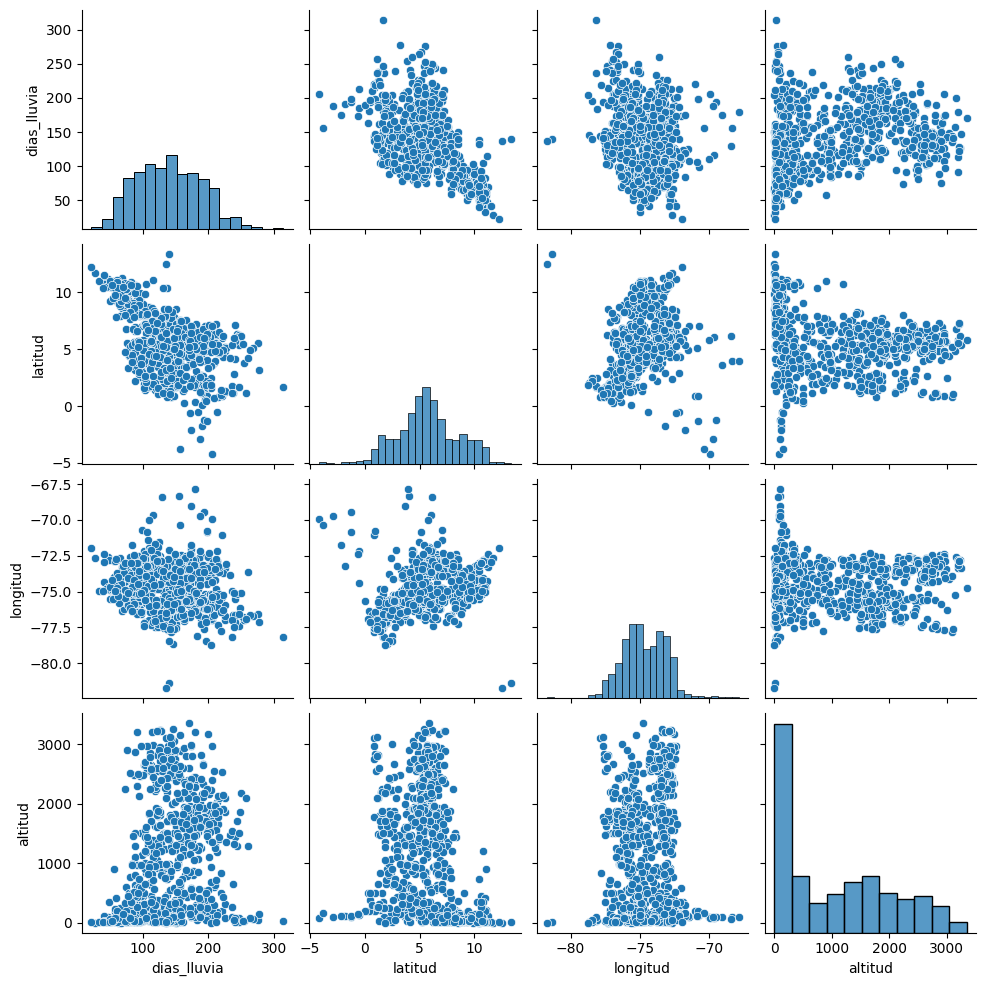

In [80]:
sns.pairplot(df5)

<Axes: >

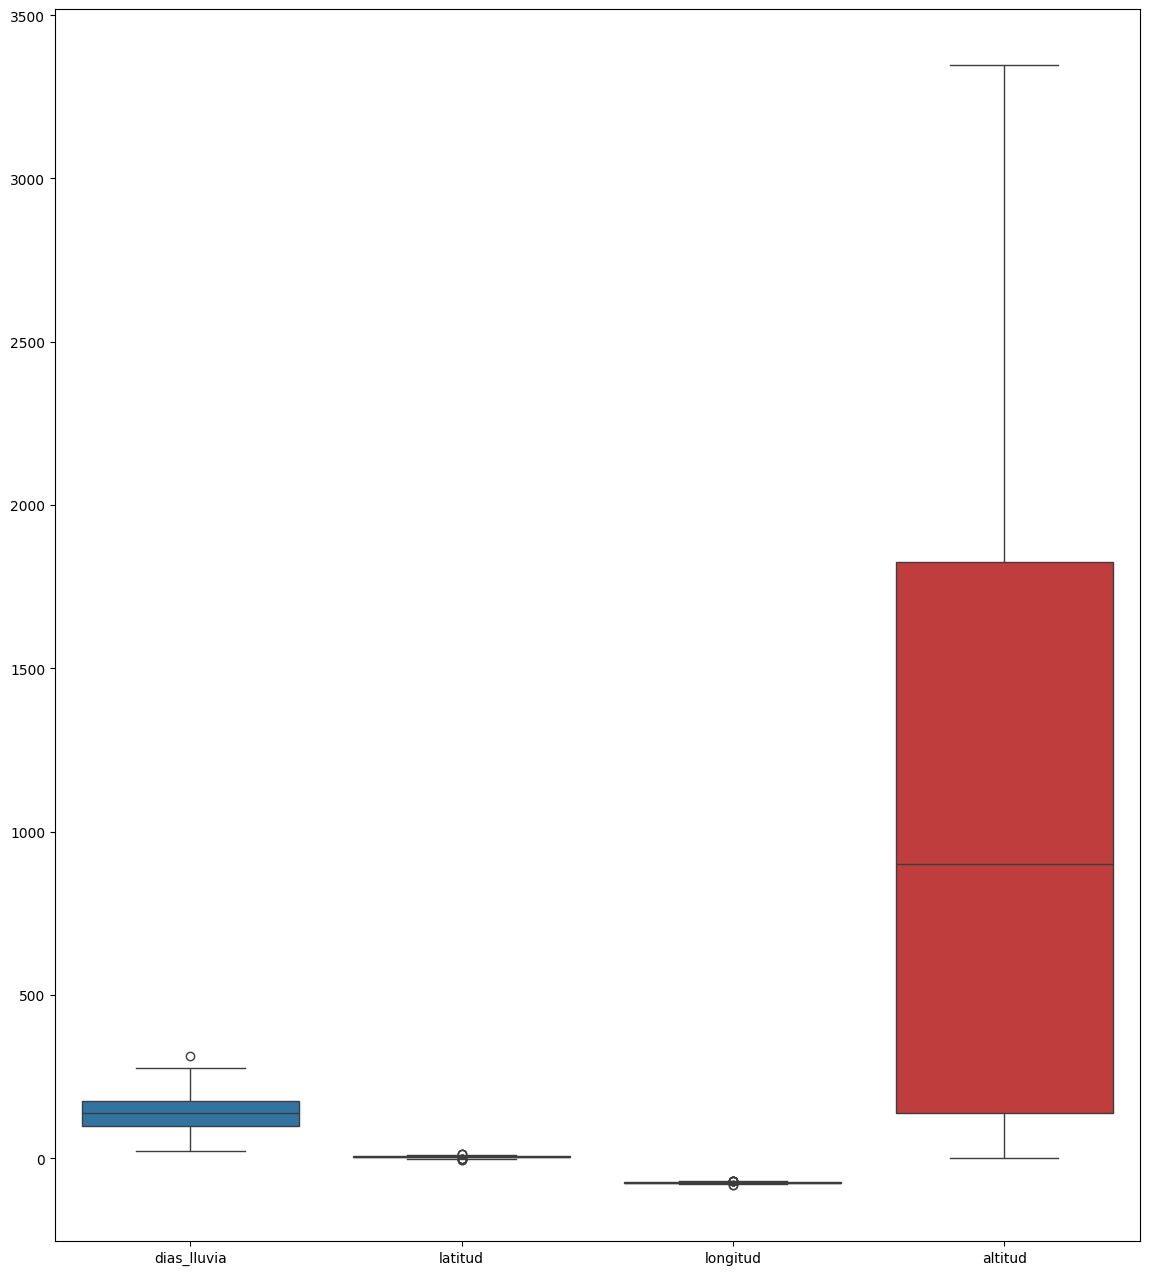

In [81]:
plt.figure(figsize=(14, 16))
sns.boxplot(df5)

In [103]:
# union de los dataframes df4 y df5
df_unificado1 = pd.merge(left=df5, right=df4, left_on='municipio', right_on='municipio', how='left')
df_unificado1

,municipio,dias_lluvia,latitud,longitud,altitud,velocidad_viento
0,ABEJORRAL,177.800000,5.79,-75.43,2450,NaN
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920,1.200000
2,ACACÍAS,195.700000,3.99,-73.77,525,NaN
3,ACANDÍ,150.500000,8.53,-77.28,2,1.527586
4,ACEVEDO,157.650000,1.81,-75.94,1350,2.019064
...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25,1.123810
757,ÁBREGO,107.433333,8.09,-73.22,1430,2.250000
758,ÍQUIRA,166.500000,2.66,-75.67,1650,NaN
759,ÚMBITA,170.200000,5.22,-73.44,2300,NaN


In [84]:
df_unificado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         761 non-null    object 
 1   dias_lluvia       761 non-null    float64
 2   latitud           761 non-null    float64
 3   longitud          761 non-null    float64
 4   altitud           761 non-null    int64  
 5   velocidad_viento  239 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 35.8+ KB


In [85]:
# Recordar imputar no por media si no por departamento
# Recordar que el viento es mas proimo al departamento que a la media
# Recordar que el clima es mas proporcional al departamento que a la media

In [86]:
df_unificado1.isnull().sum()

municipio             0
dias_lluvia           0
latitud               0
longitud              0
altitud               0
velocidad_viento    522
dtype: int64

In [104]:
#rellenar los valores nulos con la media de los dias de lluvia, por el momento lo haremos con la media
df_unificado1.fillna(df5['dias_lluvia'].mean(), inplace=True)
df_unificado1

,municipio,dias_lluvia,latitud,longitud,altitud,velocidad_viento
0,ABEJORRAL,177.800000,5.79,-75.43,2450,139.602748
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920,1.200000
2,ACACÍAS,195.700000,3.99,-73.77,525,139.602748
3,ACANDÍ,150.500000,8.53,-77.28,2,1.527586
4,ACEVEDO,157.650000,1.81,-75.94,1350,2.019064
...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25,1.123810
757,ÁBREGO,107.433333,8.09,-73.22,1430,2.250000
758,ÍQUIRA,166.500000,2.66,-75.67,1650,139.602748
759,ÚMBITA,170.200000,5.22,-73.44,2300,139.602748


In [105]:
df_unificado1.shape

(761, 6)

In [106]:
df_unificado1.dtypes

municipio            object
dias_lluvia         float64
latitud             float64
longitud            float64
altitud               int64
velocidad_viento    float64
dtype: object

In [108]:
df_unificado1.isnull().sum()

municipio           0
dias_lluvia         0
latitud             0
longitud            0
altitud             0
velocidad_viento    0
dtype: int64

## Mojemonos con un modelito de machine learning

In [109]:
# Generar variable objetivo
df_unificado1['viabilidad'] = ((df_unificado1['velocidad_viento'] > 3) & (df_unificado1['dias_lluvia'] < 200)).astype(int)


In [110]:
# Separar variables predictoras (X) y la variable objetivo (y)
X = df_unificado1[['dias_lluvia', 'latitud', 'longitud', 'altitud', 'velocidad_viento']]
y = df_unificado1['viabilidad']

In [114]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


In [115]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        87
           1       0.97      1.00      0.99       142

    accuracy                           0.98       229
   macro avg       0.99      0.98      0.98       229
weighted avg       0.98      0.98      0.98       229

Accuracy: 0.982532751091703


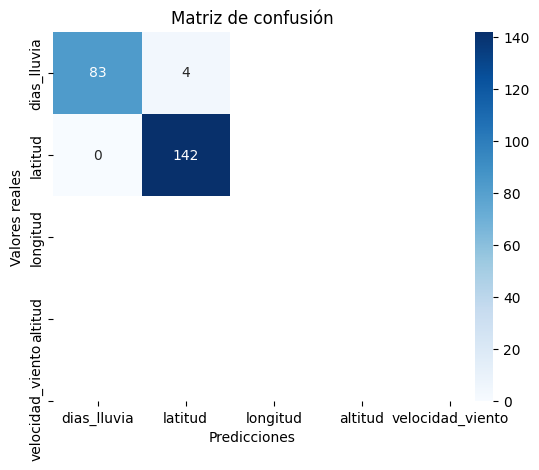

In [119]:
# Graficar la matriz de confusión


#VISUALIZACIÓN CON MATRÍZ DE CONFUSIÓN
con_ma = confusion_matrix(y_test, y_pred)
labels = ['dias_lluvia', 'latitud', 'longitud', 'altitud', 'velocidad_viento']

sns.heatmap(con_ma, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()

<Axes: >

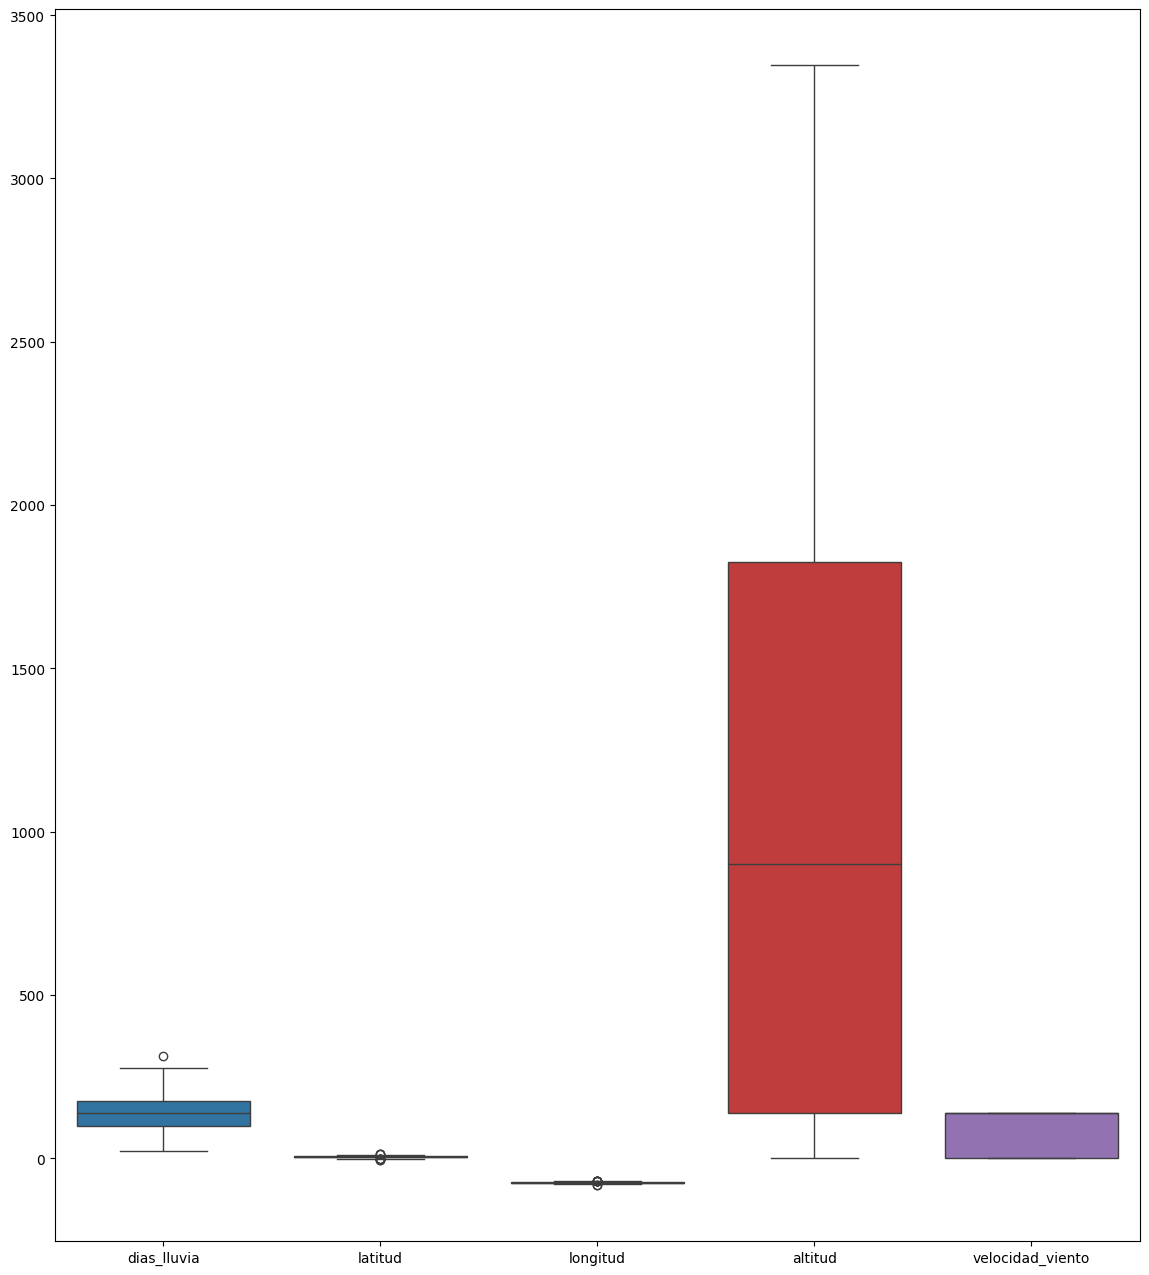

In [93]:
plt.figure(figsize=(14, 16))
sns.boxplot(df_unificado1)

In [94]:
# Unir df1 y df3
df_unificado2 = pd.merge(df1, df3, on='municipio', how='left')
df_unificado2.fillna(0, inplace=True)
df_unificado2

,municipio,potencia_m,prom_diaria,energia_activa,energia_reactiva,capacidad,tipo,usuarios,energía,emisiones,inversion
0,PUERTO NARIÑO,286.40,24.00,132215,41907.0,0.0,0,0.0,0.0,0.0,0.000000e+00
1,TARAPACA (ANM),102.60,10.16,28132,12662.0,0.0,0,0.0,0.0,0.0,0.000000e+00
2,VIGÍA DEL FUERTE,27.46,4.19,2686,1110.0,0.0,0,0.0,0.0,0.0,0.000000e+00
3,PROVIDENCIA,2190.28,23.59,1331271,284638.0,0.0,0,0.0,0.0,0.0,0.000000e+00
4,CARTAGENA DE INDIAS,247.59,10.90,64368,30561.0,3.0,Solar,2497.0,14400.0,4205.0,1.290000e+10
...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,31.23,10.05,7610,3285.0,0.0,0,0.0,0.0,0.0,0.000000e+00
4997,CARURÚ,87.82,16.39,31775,7881.0,0.0,0,0.0,0.0,0.0,0.000000e+00
4998,MITÚ,3236.71,23.56,1590470,387197.0,0.0,0,0.0,0.0,0.0,0.000000e+00
4999,TARAIRA,136.84,13.01,39226,10719.0,0.0,0,0.0,0.0,0.0,0.000000e+00


In [95]:
# se requiere escalar df_unificado['inversion'] y 
# df_unificado['tipo'] se debe poner en 3 tipos 0 n0 hay, 1 eolica, 2 solar:  y tipo_inversion   

In [102]:
df_unificado2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         95 non-null     object 
 1   potencia_m        95 non-null     float64
 2   prom_diaria       95 non-null     float64
 3   energia_activa    95 non-null     float64
 4   energia_reactiva  95 non-null     float64
 5   capacidad         95 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.6+ KB


In [97]:
df_unificado2.isnull().sum()

municipio           0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
capacidad           0
tipo                0
usuarios            0
energía             0
emisiones           0
inversion           0
dtype: int64

In [101]:
df_unificado2 = df_unificado2.groupby('municipio', as_index=False).agg({'potencia_m': 'mean', 'prom_diaria': 'mean', 'energia_activa': 'mean', 'energia_reactiva': 'mean', 'capacidad': 'first'})

df_unificado2 = df_unificado2.drop_duplicates(subset='municipio', keep='first')


print(df_unificado2)

                   municipio  potencia_m  prom_diaria  energia_activa  \
0                     ACANDI  830.817500    18.802500   406312.750000   
1                     ACANDÍ  816.094078    16.731942   357045.184466   
2                 ALTO BAUDO  107.021250    19.078125    41909.750000   
3   ALTO BAUDO (PIE DE PATO)  108.590000    23.930000    46705.000000   
4                 ALTO BAUDÓ  114.050000    23.930000    47341.000000   
..                       ...         ...          ...             ...   
90                    UNGUÍA  356.366078    12.880327   144421.575163   
91                    URIBIA  235.369333     9.146444    41456.044444   
92                    URIBÍA  188.310000    12.245000    45381.250000   
93          VIGIA DEL FUERTE   35.810000     4.950000     3567.000000   
94          VIGÍA DEL FUERTE  104.826591    13.350568    25105.136364   

    energia_reactiva  capacidad  
0      139347.887500       0.00  
1      127895.689320       0.00  
2       14539.250000 

In [99]:
df_unificado2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         95 non-null     object 
 1   potencia_m        95 non-null     float64
 2   prom_diaria       95 non-null     float64
 3   energia_activa    95 non-null     float64
 4   energia_reactiva  95 non-null     float64
 5   capacidad         95 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.6+ KB


In [100]:
df_unificado = pd.merge(df_unificado1, df_unificado2, on='municipio', how='left')
df_unificado.fillna(0, inplace=True)
df_unificado

,municipio,dias_lluvia,latitud,longitud,altitud,velocidad_viento,potencia_m,prom_diaria,energia_activa,energia_reactiva,capacidad
0,ABEJORRAL,177.800000,5.79,-75.43,2450,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920,1.200000,0.000000,0.000000,0.000000,0.00000,0.0
2,ACACÍAS,195.700000,3.99,-73.77,525,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
3,ACANDÍ,150.500000,8.53,-77.28,2,1.527586,816.094078,16.731942,357045.184466,127895.68932,0.0
4,ACEVEDO,157.650000,1.81,-75.94,1350,2.019064,0.000000,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25,1.123810,0.000000,0.000000,0.000000,0.00000,0.0
757,ÁBREGO,107.433333,8.09,-73.22,1430,2.250000,0.000000,0.000000,0.000000,0.00000,0.0
758,ÍQUIRA,166.500000,2.66,-75.67,1650,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
759,ÚMBITA,170.200000,5.22,-73.44,2300,139.602748,0.000000,0.000000,0.000000,0.00000,0.0


In [112]:
df_unificado['tipo'].value_counts()

NameError: name 'df_unificado' is not defined

# ***Error ***

In [54]:
# No finciona # def Tipo_dummies(column):
    if column == 'Solar':
        return 1
    elif column == 'Eólico':
        return -1
    else:
        return 0

IndentationError: unexpected indent (2800254153.py, line 2)

In [114]:
df_unificado['#Tipo'] = df_unificado['Tipo'].apply(Tipo_dummies)
df_unificado['#Tipo'].value_counts()

KeyError: 'Tipo'

In [56]:
'''#ConVErtir a numerico
if 'Tipo' in df_unificado.columns:
    df_unificado = pd.get_dummies(df_unificado, columns=['Tipo'], dtype=float)
df_unificado'''

"#ConVErtir a numerico\nif 'Tipo' in df_unificado.columns:\n    df_unificado = pd.get_dummies(df_unificado, columns=['Tipo'], dtype=float)\ndf_unificado"

In [57]:
# escaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva', 'Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable']


scaler = MinMaxScaler()

df_unificado[numerical_features] = scaler.fit_transform(df_unificado[numerical_features])

In [115]:
df_unificado

,municipio,dias_lluvia,latitud,longitud,altitud,velocidad_viento,potencia_m,prom_diaria,energia_activa,energia_reactiva,capacidad
0,ABEJORRAL,177.800000,5.79,-75.43,2450,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920,0.900000,0.000000,0.000000,0.000000,0.00000,0.0
2,ACACÍAS,195.700000,3.99,-73.77,525,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
3,ACANDÍ,150.500000,8.53,-77.28,2,1.322727,816.094078,16.731942,357045.184466,127895.68932,0.0
4,ACEVEDO,157.650000,1.81,-75.94,1350,2.395889,0.000000,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25,1.276923,0.000000,0.000000,0.000000,0.00000,0.0
757,ÁBREGO,107.433333,8.09,-73.22,1430,2.300000,0.000000,0.000000,0.000000,0.00000,0.0
758,ÍQUIRA,166.500000,2.66,-75.67,1650,139.602748,0.000000,0.000000,0.000000,0.00000,0.0
759,ÚMBITA,170.200000,5.22,-73.44,2300,139.602748,0.000000,0.000000,0.000000,0.00000,0.0


In [117]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']


In [118]:
# Crear una nueva variable que represente la energía total generada
df_unificado['energia_total'] = df_unificado['energia_activa'] + df_unificado['energia_reactiva']

In [119]:
# Crear una variable que represente la eficiencia de la generación
df_unificado['eficiencia_generacion'] = df_unificado['energia_total'] / df_unificado['Capacidad_instalada']


KeyError: 'Capacidad_instalada'

In [120]:
# Crear una variable que represente la generación por usuario
df_unificado['generacion_usuario'] = df_unificado['energia_total'] / df_unificado['Usuarios']


KeyError: 'Usuarios'

In [121]:
# Crear una variable que represente la generación promedio por municipio
df_unificado['generacion_promedio_municipio'] = df_unificado.groupby('Municipio')['energia_total'].transform('mean')

# Crear una variable que represente la generación total anual por departamento
df_unificado['generacion_anual_departamento'] = df_unificado.groupby(['Departamento', 'anio'])['energia_total'].transform('sum')

KeyError: 'Municipio'

In [122]:
df_unificado

,municipio,dias_lluvia,latitud,longitud,altitud,velocidad_viento,potencia_m,prom_diaria,energia_activa,energia_reactiva,capacidad,energia_total
0,ABEJORRAL,177.800000,5.79,-75.43,2450,139.602748,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
1,ABRIAQUÍ,200.600000,6.64,-76.08,1920,0.900000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
2,ACACÍAS,195.700000,3.99,-73.77,525,139.602748,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
3,ACANDÍ,150.500000,8.53,-77.28,2,1.322727,816.094078,16.731942,357045.184466,127895.68932,0.0,484940.873786
4,ACEVEDO,157.650000,1.81,-75.94,1350,2.395889,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,10.68,-74.21,25,1.276923,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
757,ÁBREGO,107.433333,8.09,-73.22,1430,2.300000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
758,ÍQUIRA,166.500000,2.66,-75.67,1650,139.602748,0.000000,0.000000,0.000000,0.00000,0.0,0.000000
759,ÚMBITA,170.200000,5.22,-73.44,2300,139.602748,0.000000,0.000000,0.000000,0.00000,0.0,0.000000


In [123]:
correlacionf = df_unificado[[ 'Usuarios', 'Capacidad_instalada',	'Energía_p', 'Energía_no_renovable',	'potencia_m',	'prom_diaria',	'energia_activa',	'energia_reactiva']].corr()
sns.heatmap(correlacionf, annot=True, cmap='coolwarm')

KeyError: "['Usuarios', 'Capacidad_instalada', 'Energía_p', 'Energía_no_renovable'] not in index"

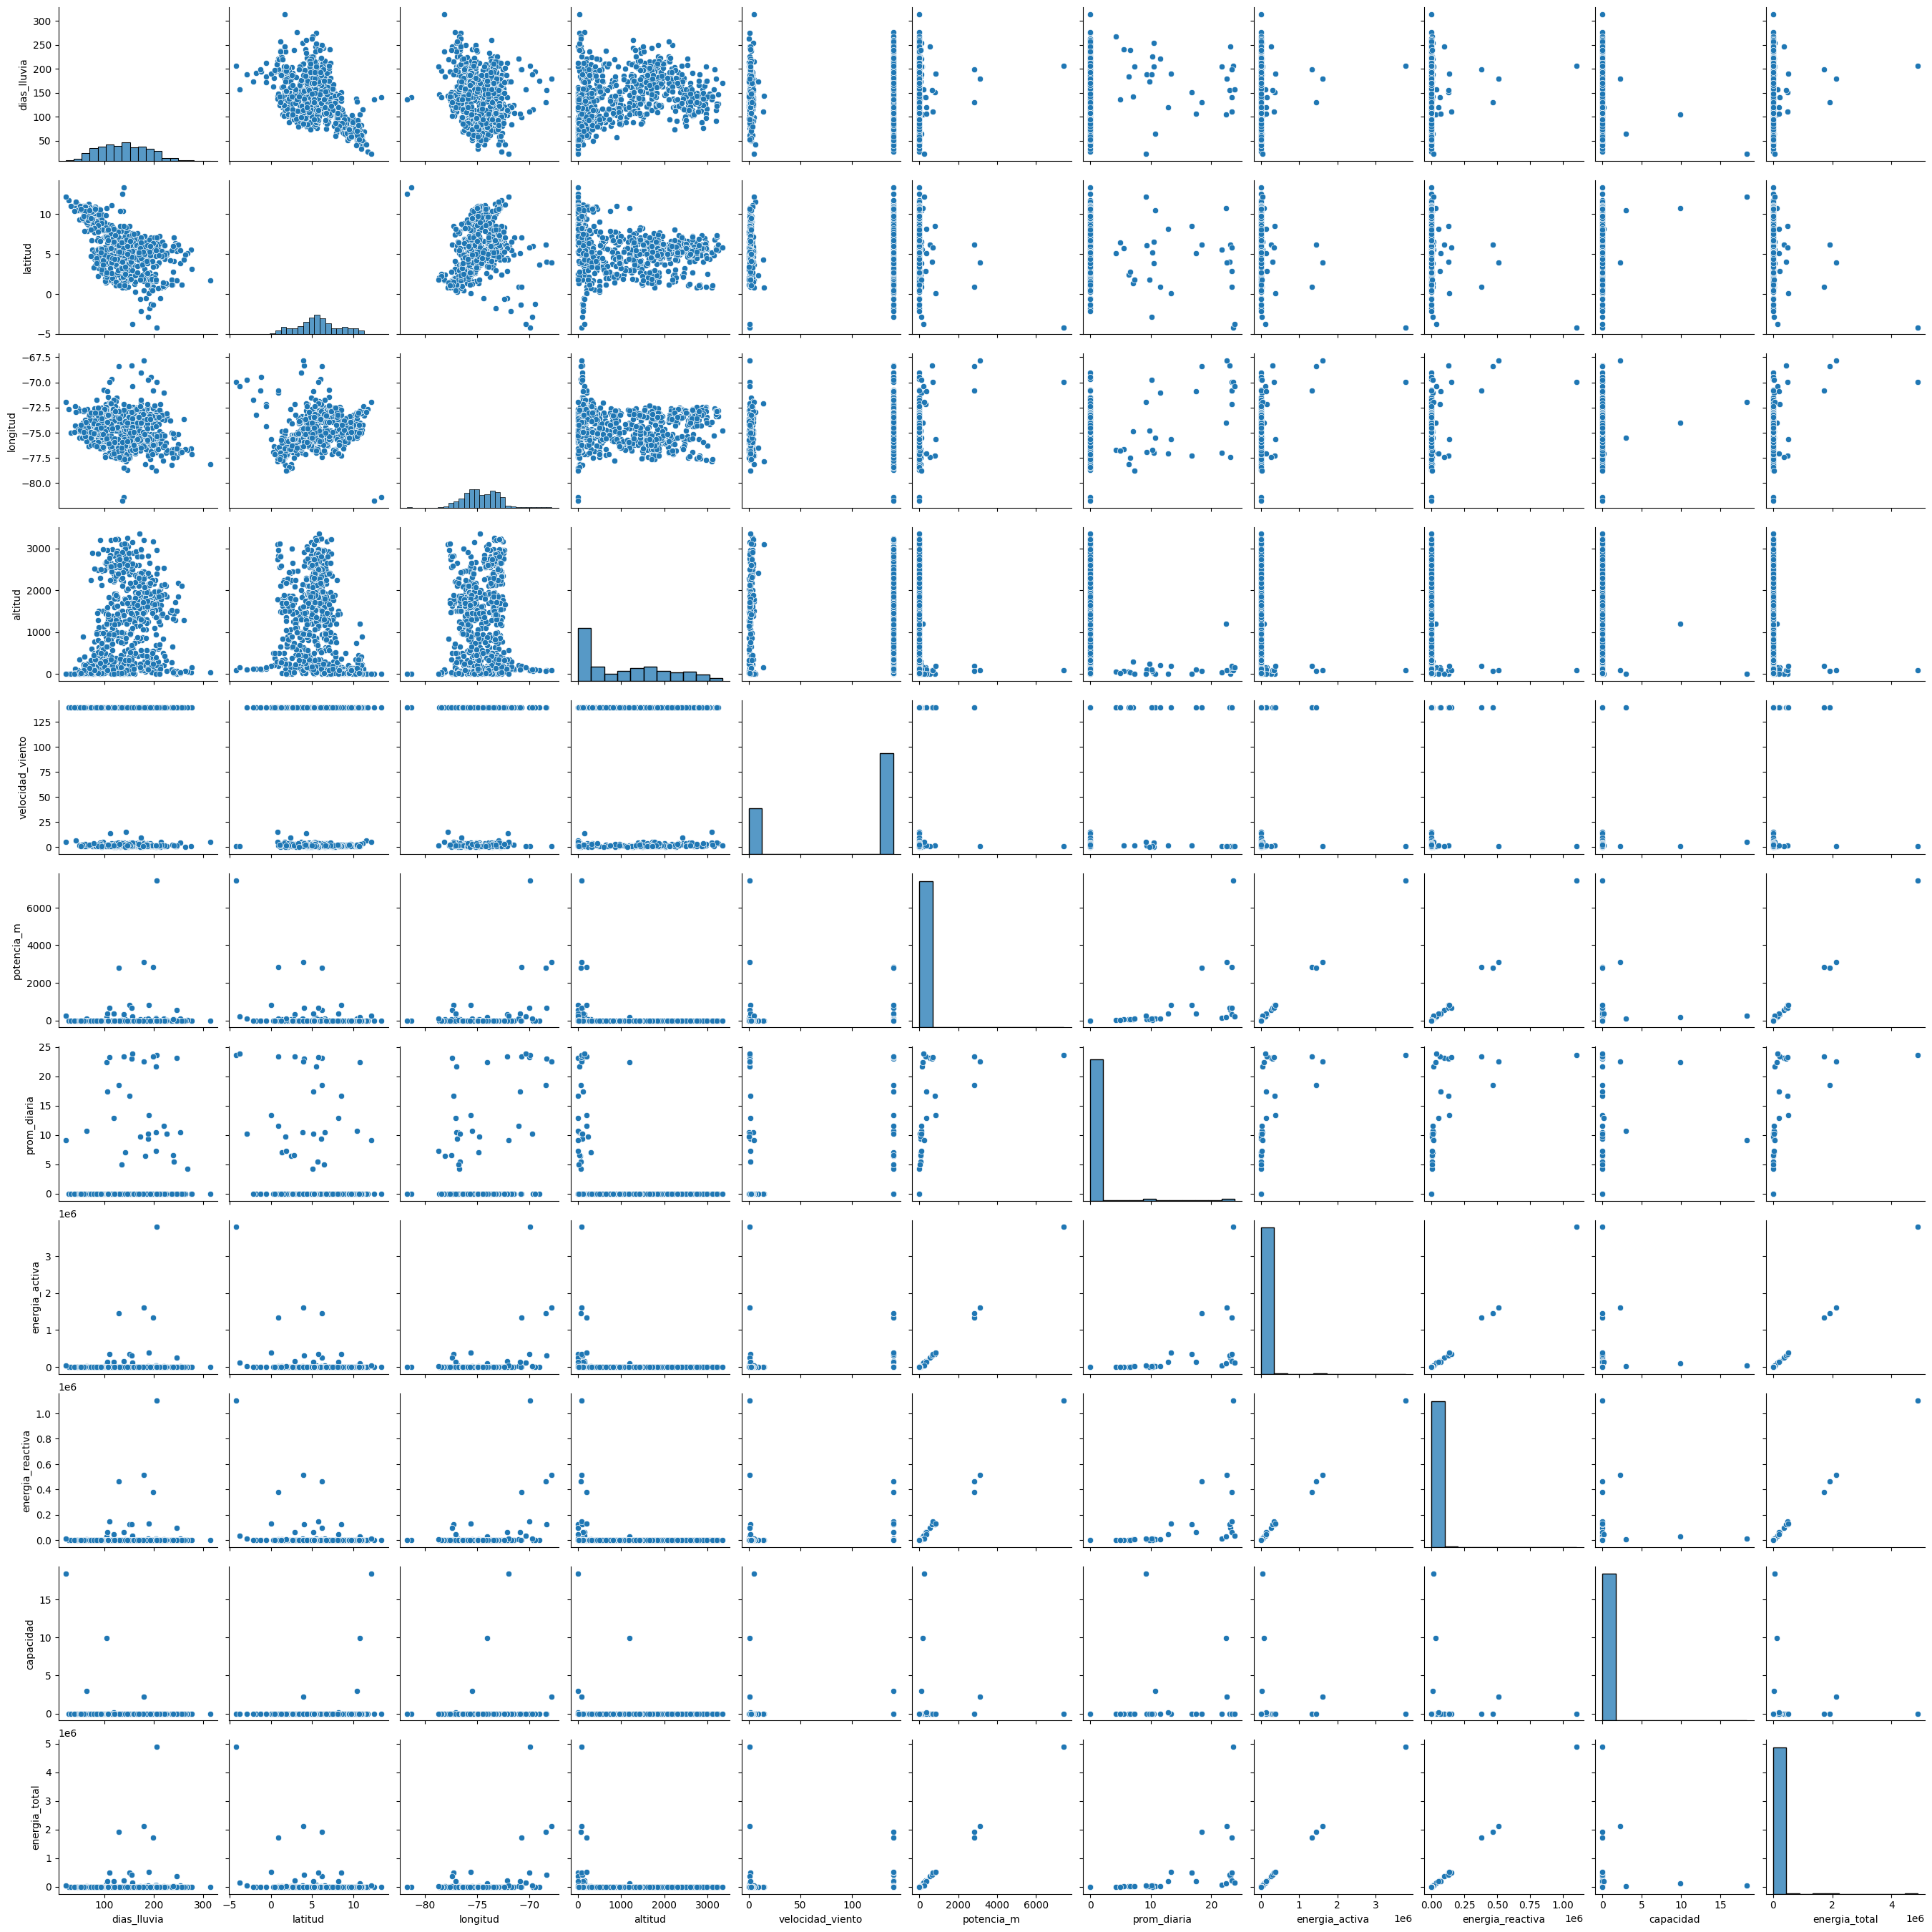

In [125]:
sns.pairplot(df_unificado)

<Axes: >

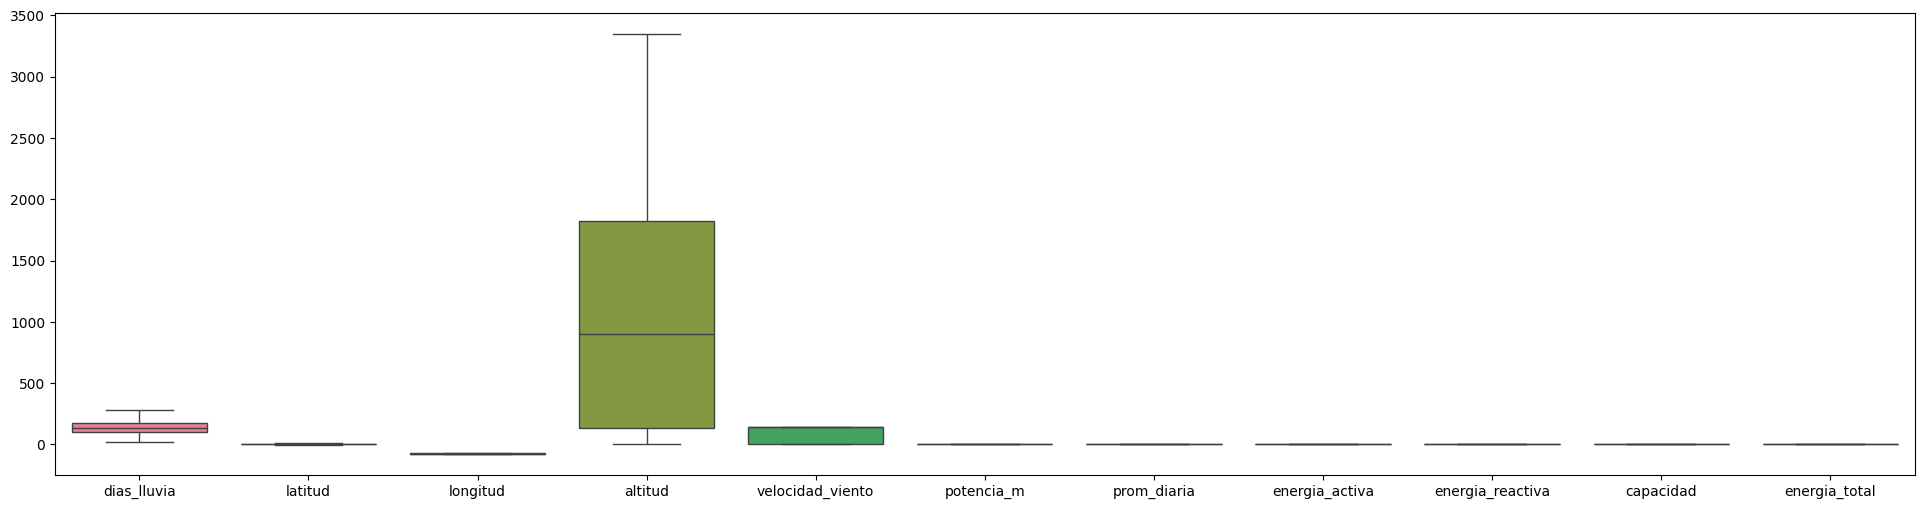

In [127]:
plt.figure(figsize=(24, 6))
bigotes = df_unificado
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(bigotes, showfliers=False)

In [128]:
df_unificado.dtypes

municipio            object
dias_lluvia         float64
latitud             float64
longitud            float64
altitud               int64
velocidad_viento    float64
potencia_m          float64
prom_diaria         float64
energia_activa      float64
energia_reactiva    float64
capacidad           float64
energia_total       float64
dtype: object

In [129]:
df_unificado.isnull().sum()

municipio           0
dias_lluvia         0
latitud             0
longitud            0
altitud             0
velocidad_viento    0
potencia_m          0
prom_diaria         0
energia_activa      0
energia_reactiva    0
capacidad           0
energia_total       0
dtype: int64

In [130]:
df_unificado.shape

(761, 12)

<Axes: >

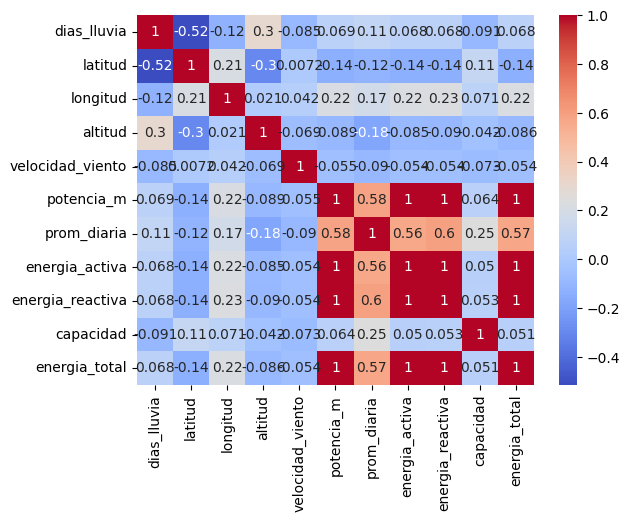

In [140]:
#correlcion
correlacion3 = df_unificado[['dias_lluvia', 'latitud', 'longitud', 'altitud', 'velocidad_viento', 'potencia_m', 'prom_diaria', 'energia_activa', 'energia_reactiva', 'capacidad', 'energia_total']].corr()
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


# Create dummy variables for the 'Tipo' column
X = df_unificado[['dias_lluvia', 'latitud', 'altitud']],
       
 = df_unificado


In [145]:
y = df_unificado['potencial_renovable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo1 = RandomForestClassifier()
modelo1.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo1.predict(X_test)

KeyError: 'potencial_renovable'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(modelo1, X, y, cv=kfold)
print(classification_report(y_test, y_pred))
print(cross_val_scores)
print(cross_val_scores.mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

[1. 1. 1. 1. 1.]
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


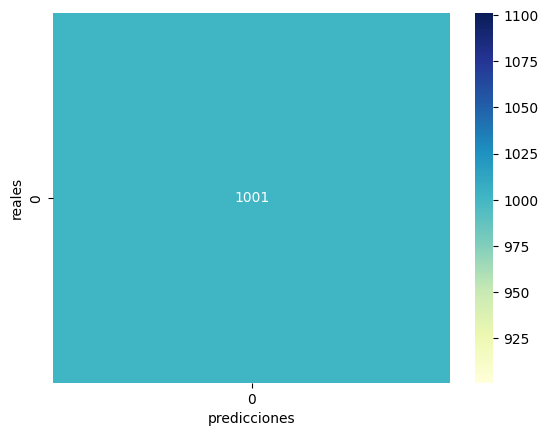

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['solar', 'eolico']
#cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1001]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


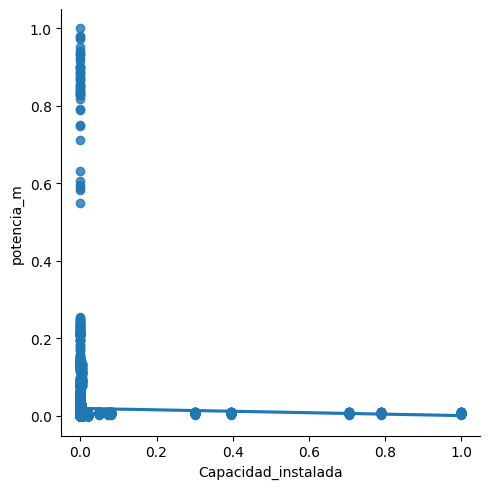

In [ ]:
sns.lmplot(data=df_unificado, x='Capacidad_instalada', y='potencia_m')

<Axes: >

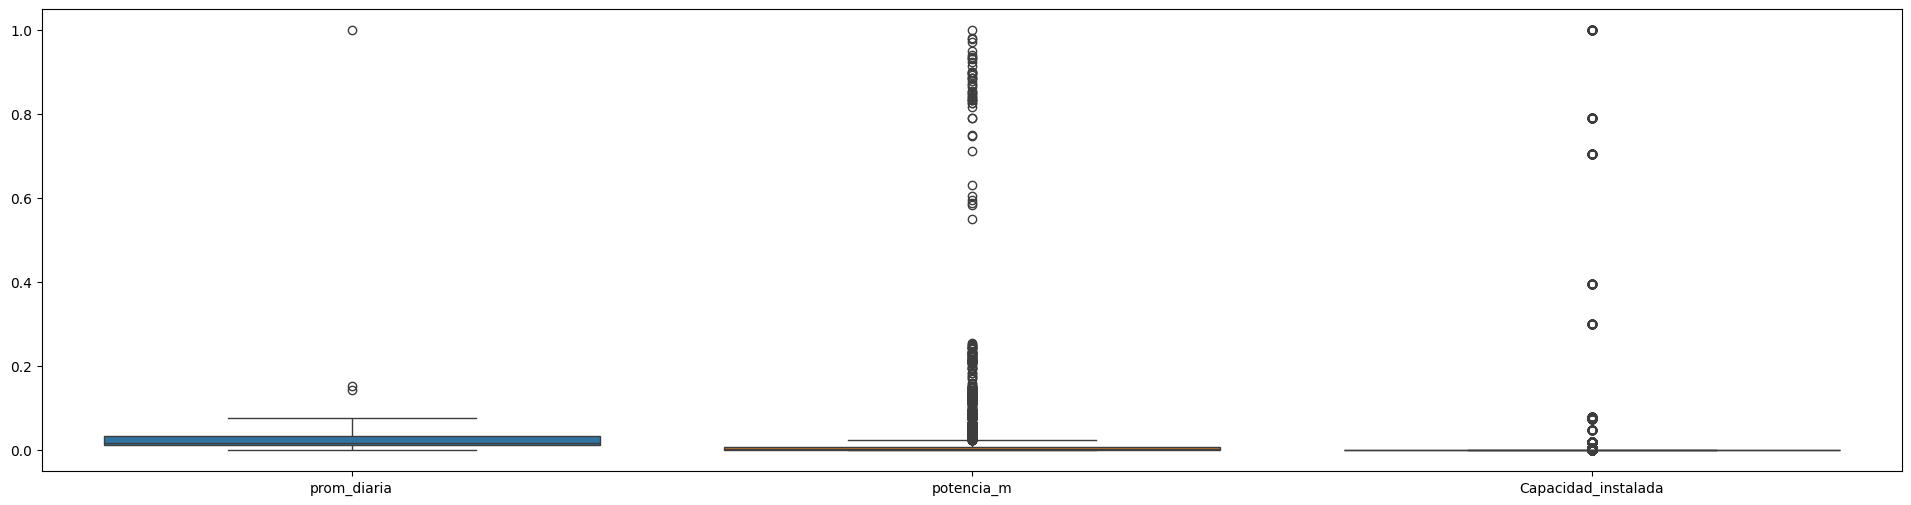

In [ ]:
plt.figure(figsize=(24, 6))
datos = df_unificado[['prom_diaria', 'potencia_m', 'Capacidad_instalada']]

sns.boxplot(datos, whis=3)

<ipython-input-78-c71b057eacb2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_unificado['Capacidad_instalada'])


<Axes: xlabel='Capacidad_instalada', ylabel='Density'>

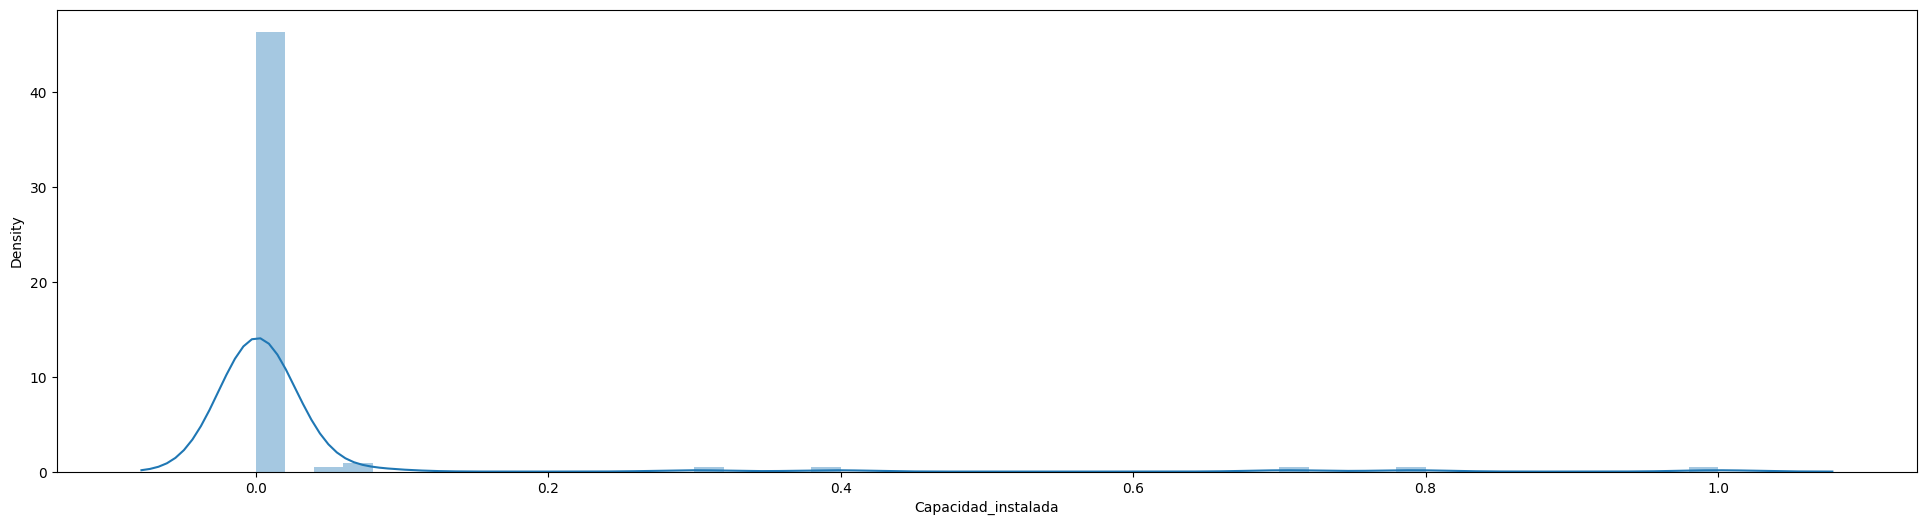

In [ ]:
plt.figure(figsize=(24, 6))
sns.distplot(df_unificado['Capacidad_instalada'])
#

In [ ]:
from scipy.stats.mstats import winsorize

potencia_winsorized = df_unificado['potencia_m'].copy()
y = winsorize(potencia_winsorized, limits=[0.05, 0.05])

Capacidad_winsorized = df_unificado['Capacidad_instalada'].copy()
z = winsorize(potencia_winsorized, limits=[0.05, 0.05])

diaria_winsorized = df_unificado['prom_diaria'].copy()
u = winsorize(potencia_winsorized, limits=[0.05, 0.05])

<Axes: >

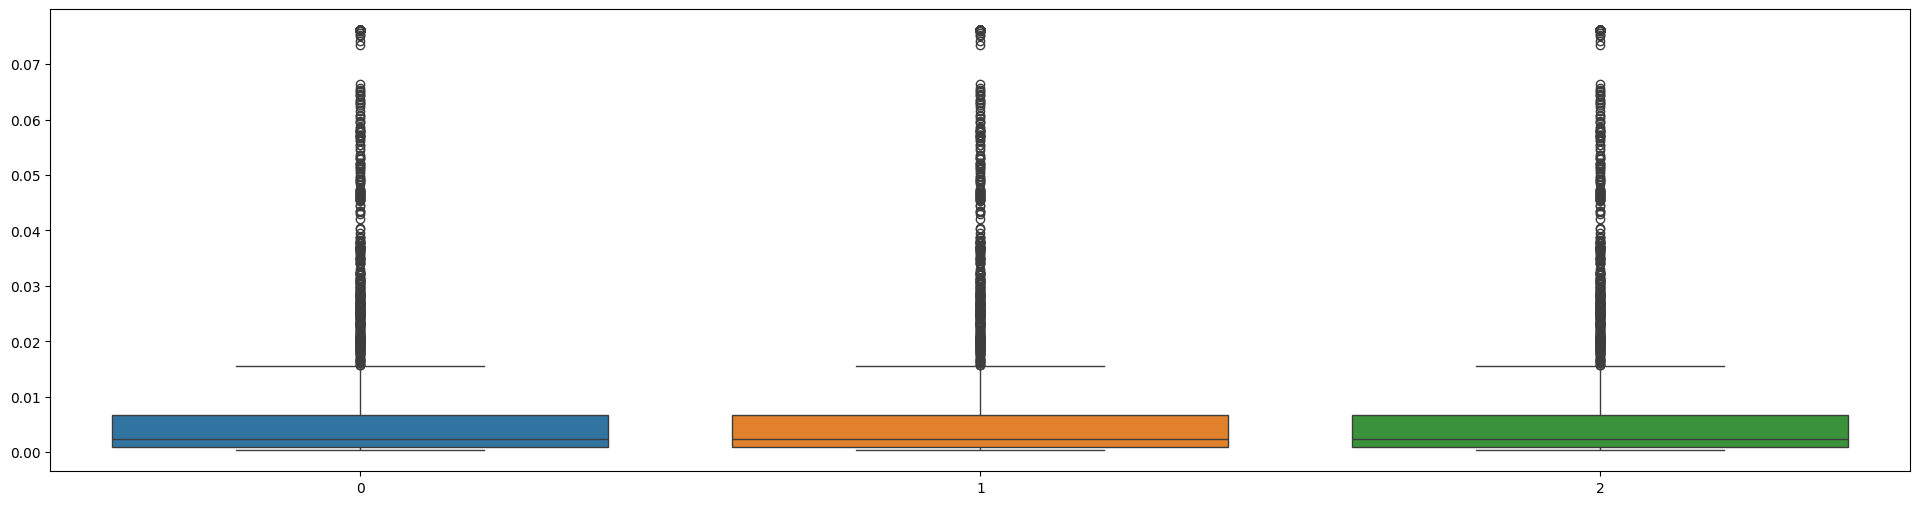

In [ ]:
plt.figure(figsize=(24, 6))
w = y, z, u
sns.boxplot(w)

In [ ]:
#Regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

X = pd.get_dummies(df_unificado[['potencia_m', 'Capacidad_instalada', 'Tipo']],
                   columns=['Tipo'],
                   drop_first=True) # To avoid multicollinearity

y = df_unificado['potencial_renovable']

# Check the unique values in your target variable
print(y.unique())


if len(y.unique()) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    modelo2 = LogisticRegression()
    modelo2.fit(X_train, y_train)

    # Evaluar el modelo
    y_pred = modelo2.predict(X_test)

[0]


In [ ]:
#Regresion logistica
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score

accuracy_score = accuracy_score(y_test, y_pred)
reporte_score = classification_report(y_test, y_pred)

In [ ]:
print(accuracy_score, reporte_score)

1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = ['solar', 'eolico']
#cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu')
plt.xlabel('predicciones')
plt.ylabel('reales')
plt.show()

In [ ]:
df_unificado

,Municipio,anio,potencia_m,prom_diaria,energia_activa,energia_reactiva,Departamento,Tipo,Usuarios,Capacidad_instalada,Energía_p,Energía_no_renovable,#Tipo,energia_total,eficiencia_generacion,generacion_usuario,generacion_promedio_municipio,generacion_anual_departamento,potencial_renovable
0,PUERTO NARIÑO,2024,0.008395,0.047244,0.006412,0.007710,0,0,0.000,0.000,0.000,0.000,0,0.014122,inf,inf,0.012286,9.749556,0
1,TARAPACA (ANM),2024,0.003008,0.020000,0.001364,0.002330,0,0,0.000,0.000,0.000,0.000,0,0.003694,inf,inf,0.003575,9.749556,0
2,VIGÍA DEL FUERTE,2024,0.000805,0.008248,0.000130,0.000204,0,0,0.000,0.000,0.000,0.000,0,0.000334,inf,inf,0.002874,9.749556,0
3,PROVIDENCIA,2024,0.064205,0.046437,0.064559,0.052369,0,0,0.000,0.000,0.000,0.000,0,0.116929,inf,inf,0.105461,9.749556,0
4,CARTAGENA DE INDIAS,2024,0.007258,0.021457,0.003121,0.005623,BOLÍVAR,Solar,0.006,0.006,0.006,0.006,1,0.008744,1.457378,1.457442,0.002539,0.190984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,BUENAVENTURA,2024,0.000915,0.019783,0.000369,0.000604,0,0,0.000,0.000,0.000,0.000,0,0.000973,inf,inf,0.003391,9.749556,0
4997,CARURÚ,2024,0.002574,0.032264,0.001541,0.001450,0,0,0.000,0.000,0.000,0.000,0,0.002991,inf,inf,0.002233,9.749556,0
4998,MITÚ,2024,0.094880,0.046378,0.077129,0.071239,0,0,0.000,0.000,0.000,0.000,0,0.148368,inf,inf,0.134845,9.749556,0
4999,TARAIRA,2024,0.004011,0.025610,0.001902,0.001972,0,0,0.000,0.000,0.000,0.000,0,0.003874,inf,inf,0.003193,9.749556,0


<Axes: >

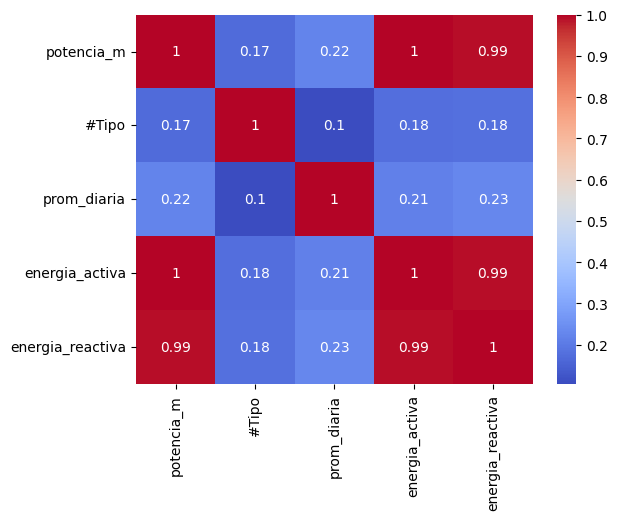

In [ ]:
#correlcion
corro= df_unificado[['potencia_m', '#Tipo',	'prom_diaria','energia_activa',	'energia_reactiva']].corr()
sns.heatmap(corro, annot=True, cmap='coolwarm')

**Modelo Naive Bayes**

La clasificación de este modelo usa los datos de Capacidad instalada, promedio diario, usuarios y promedio diario, para predecir si puede haber un proyecto de energía renovable y de qué tipo sería

In [ ]:
#MODELO NAIVE BAYES (Gaussiano)
Xn = df_unificado[['potencia_m', 'Capacidad_instalada', 'Usuarios', 'prom_diaria']] #Datos relacionados
yn = df_unificado['#Tipo'] #Objetivo


Xn_ent, Xn_prue, yn_ent, yn_prue = train_test_split(Xn, yn, test_size=0.2, random_state=42)

#Modelo
naive_model = GaussianNB()
naive_model.fit(Xn_ent, yn_ent)
yn_pred = naive_model.predict(Xn_prue)


#Evaluación del modelo
print(classification_report(yn_prue, yn_pred))
print('Accuracy:', accuracy_score(yn_prue, yn_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        81
           0       1.00      1.00      1.00       744
           1       1.00      1.00      1.00       176

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

Accuracy: 1.0


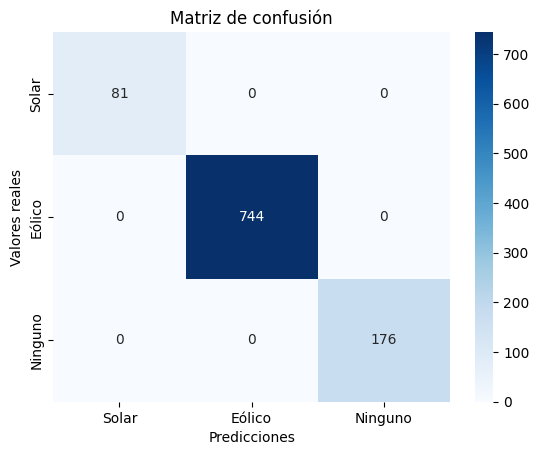

In [ ]:
#VISUALIZACIÓN CON MATRÍZ DE CONFUSIÓN
con_ma = confusion_matrix(yn_prue, yn_pred)
labels = ['Solar', 'Eólico', 'Ninguno']

sns.heatmap(con_ma, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')
plt.show()